In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from scipy.cluster import hierarchy as hc
from fastai.structured import *
from fastai.imports import *

In [185]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [186]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [187]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [188]:
train_cats(df)#categorizing the string columns

In [189]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [190]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [191]:
df.dtypes

Loan_ID              category
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object

Gender
Female     520069
Male      2663319
Name: ApplicantIncome, dtype: int64

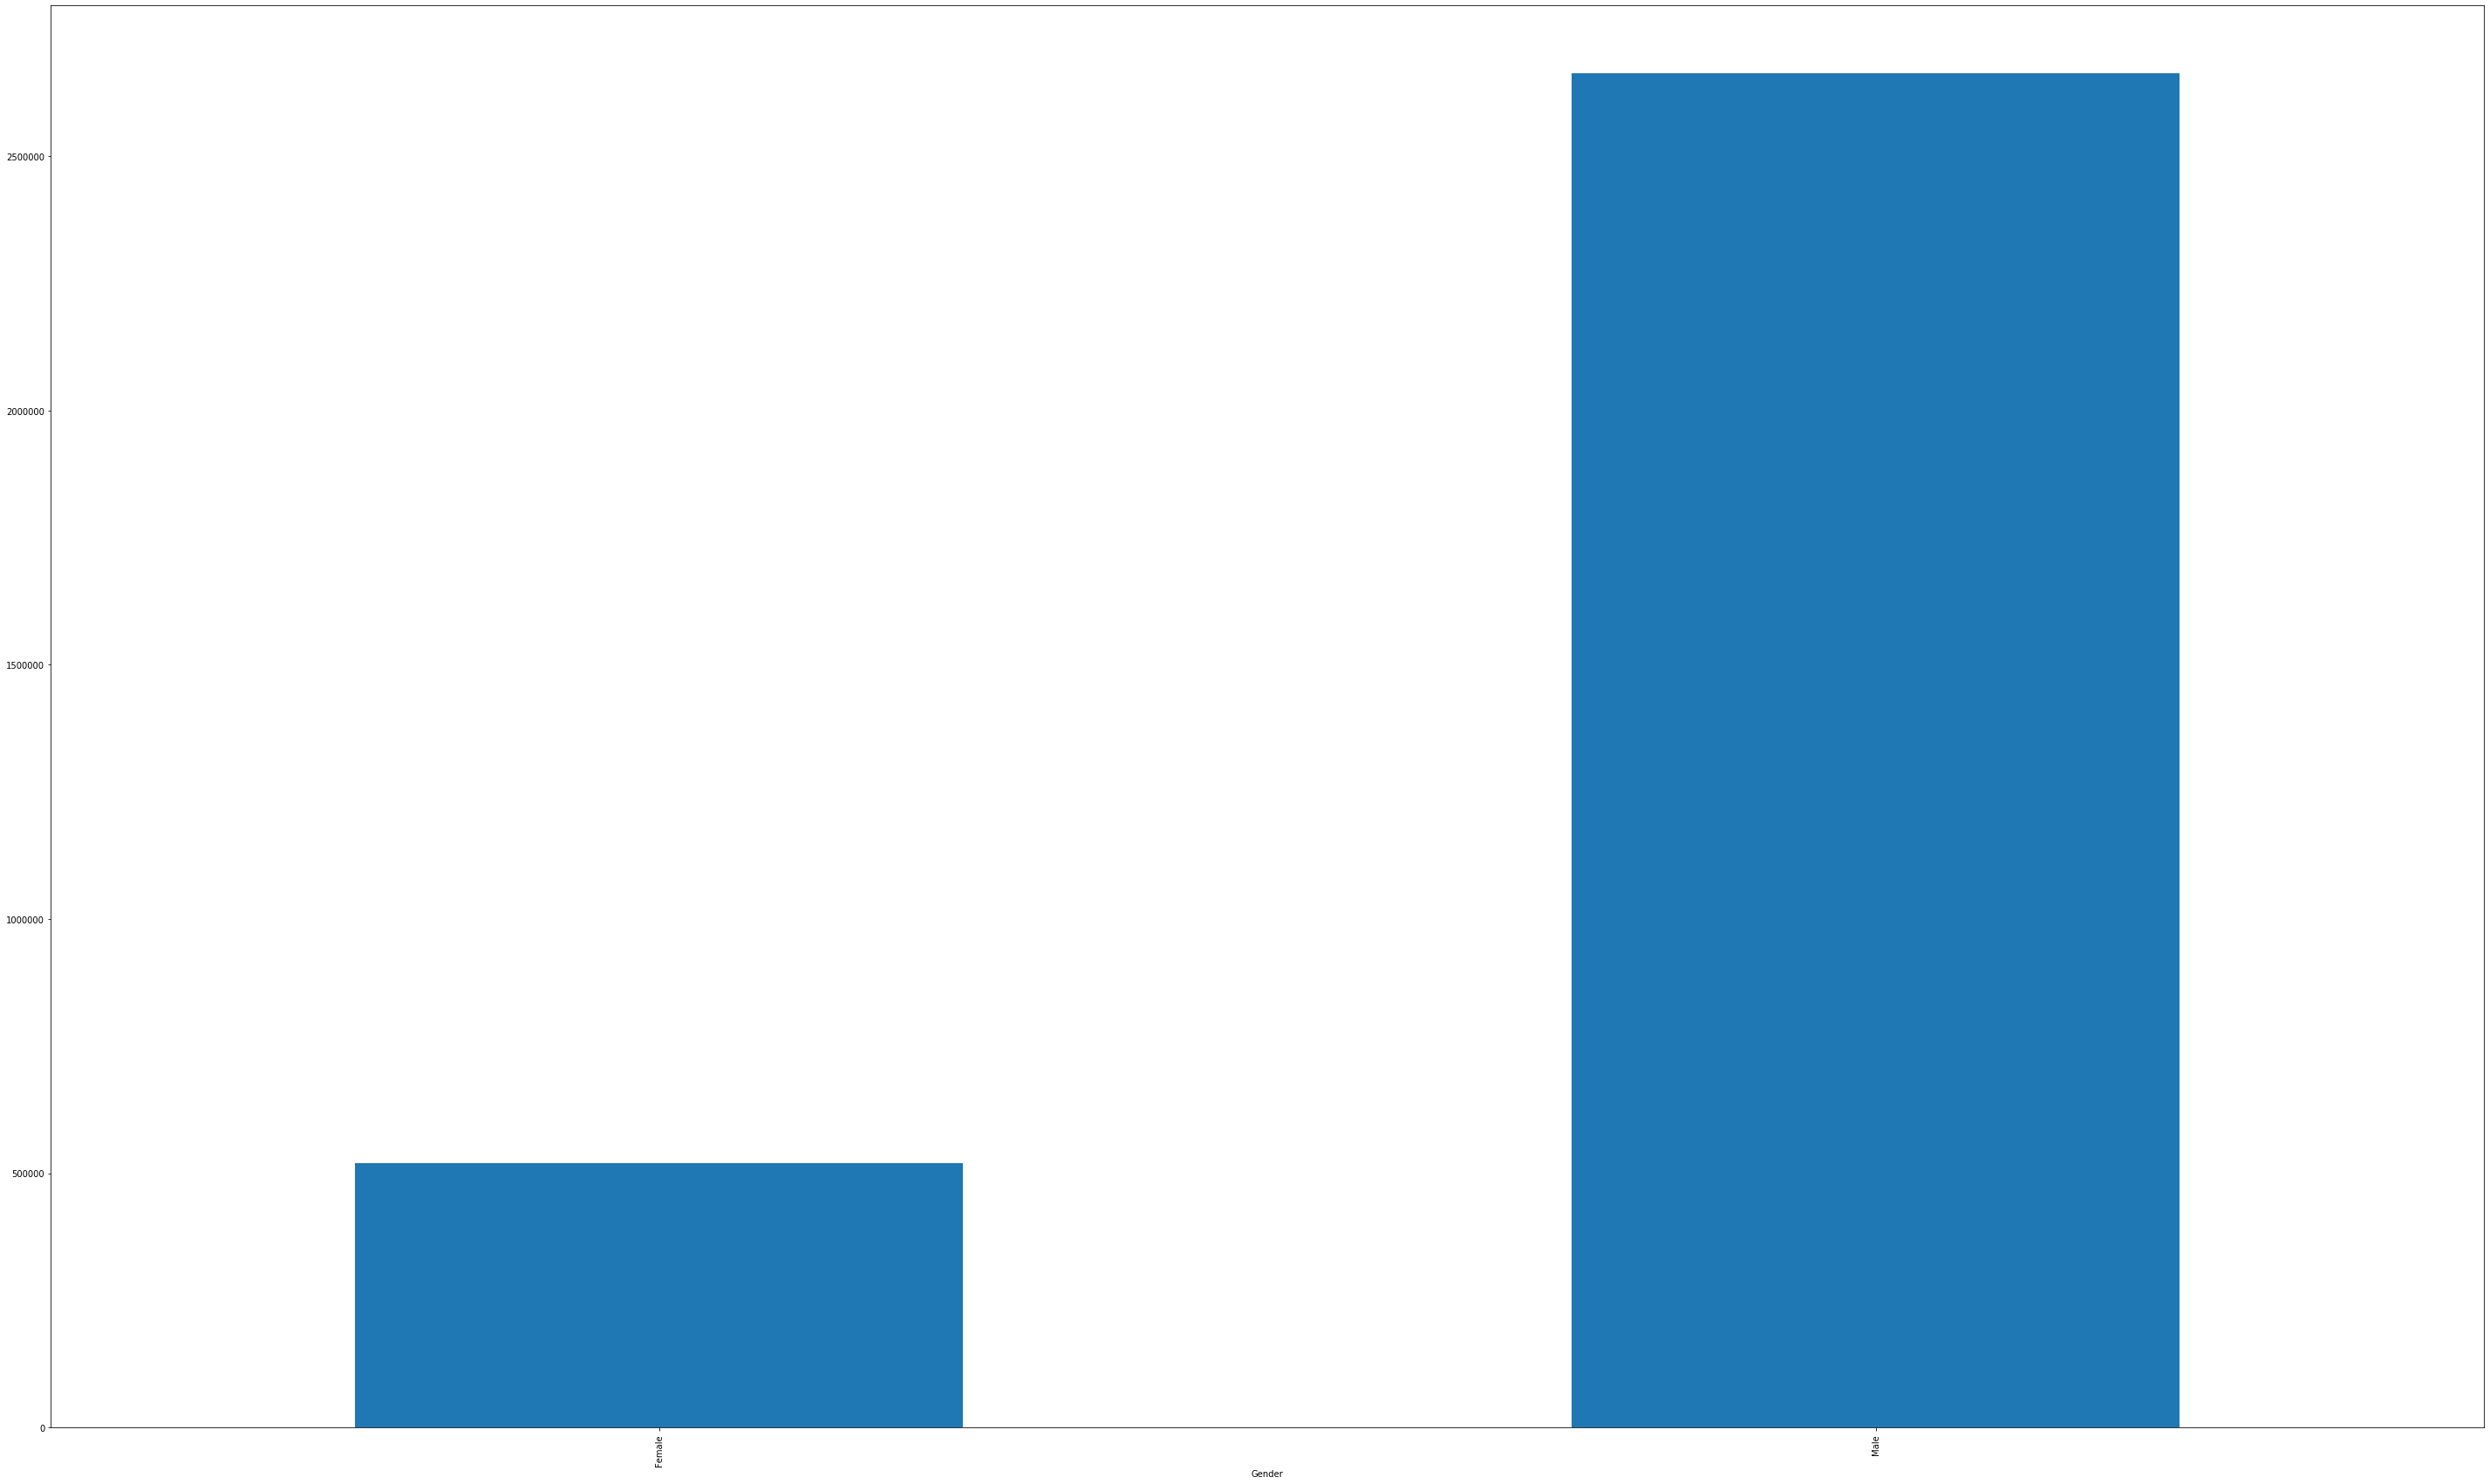

In [192]:
fig, ax = plt.subplots(figsize=(50,30))
df.groupby(["Gender"]).sum()["ApplicantIncome"].plot.bar(ax=ax)
df.groupby(["Gender"]).sum()["ApplicantIncome"]

Gender
Female    124097.000000
Male      852293.919989
Name: CoapplicantIncome, dtype: float64

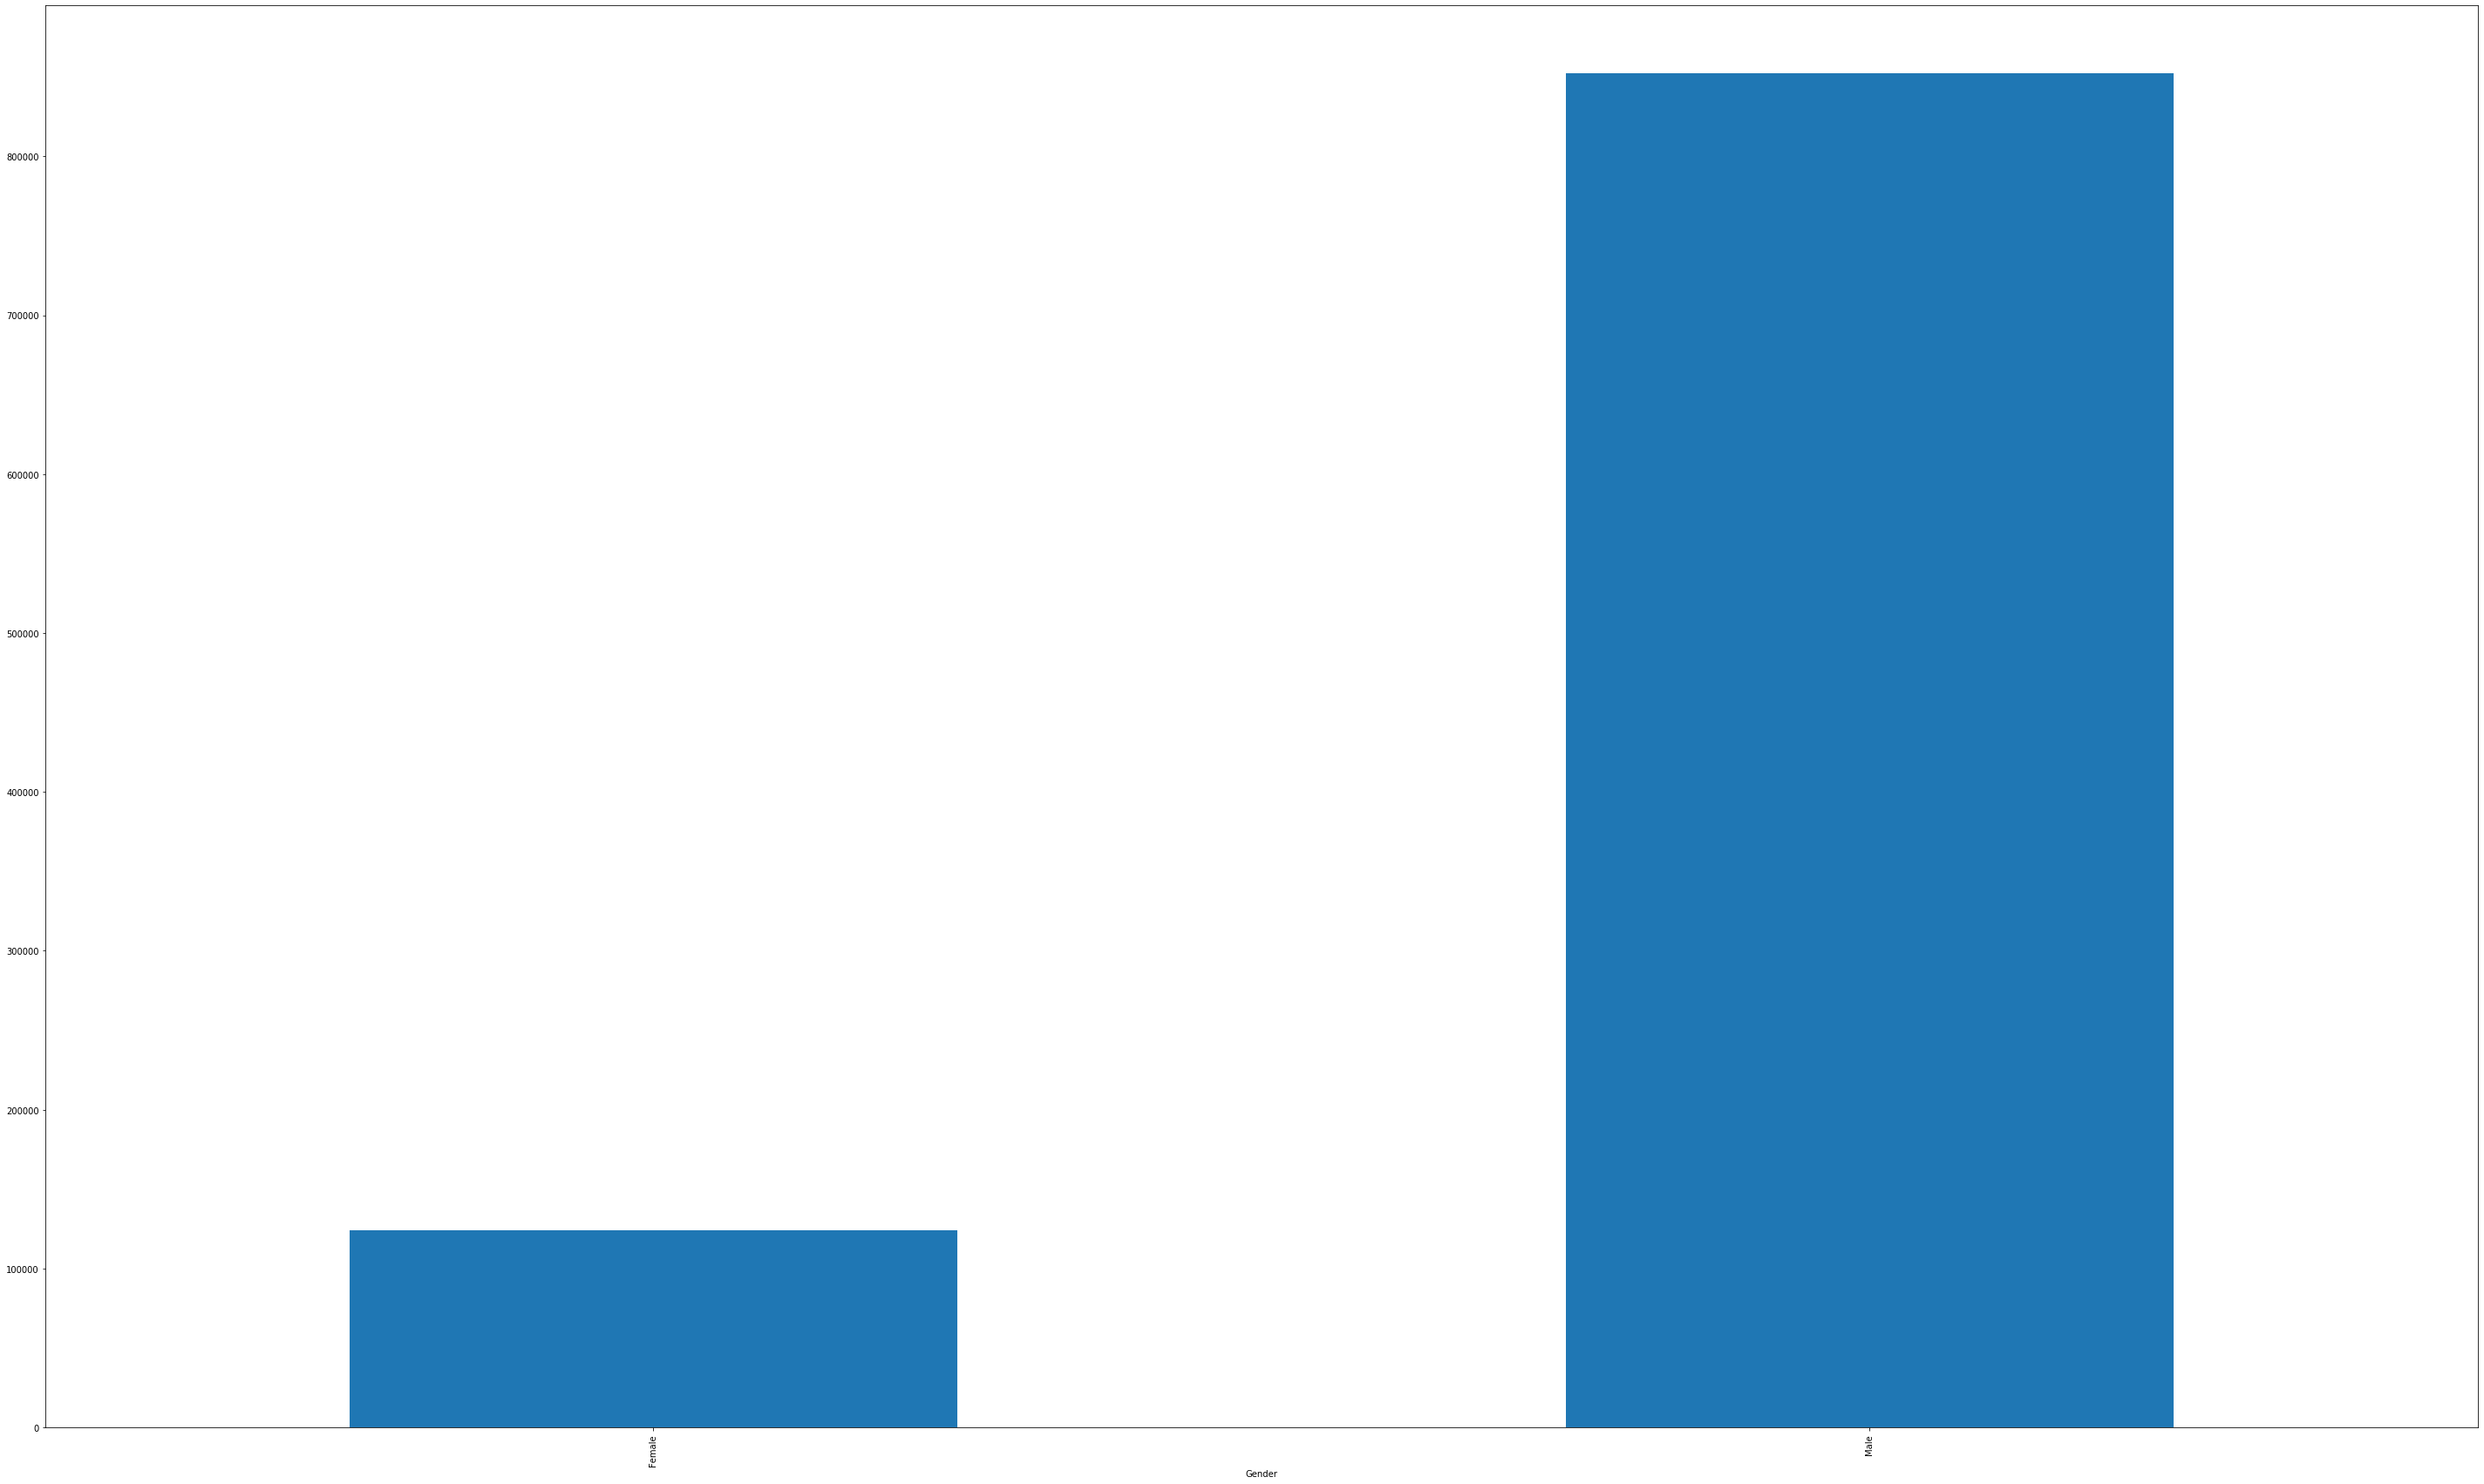

In [193]:
fig, ax = plt.subplots(figsize=(50,30))
df.groupby(["Gender"]).sum()["CoapplicantIncome"].plot.bar(ax=ax)
df.groupby(["Gender"]).sum()["CoapplicantIncome"]

Education,Graduate,Not Graduate
Gender,,
Female,113271.000000,10826.0
Male,693979.919989,158314.0


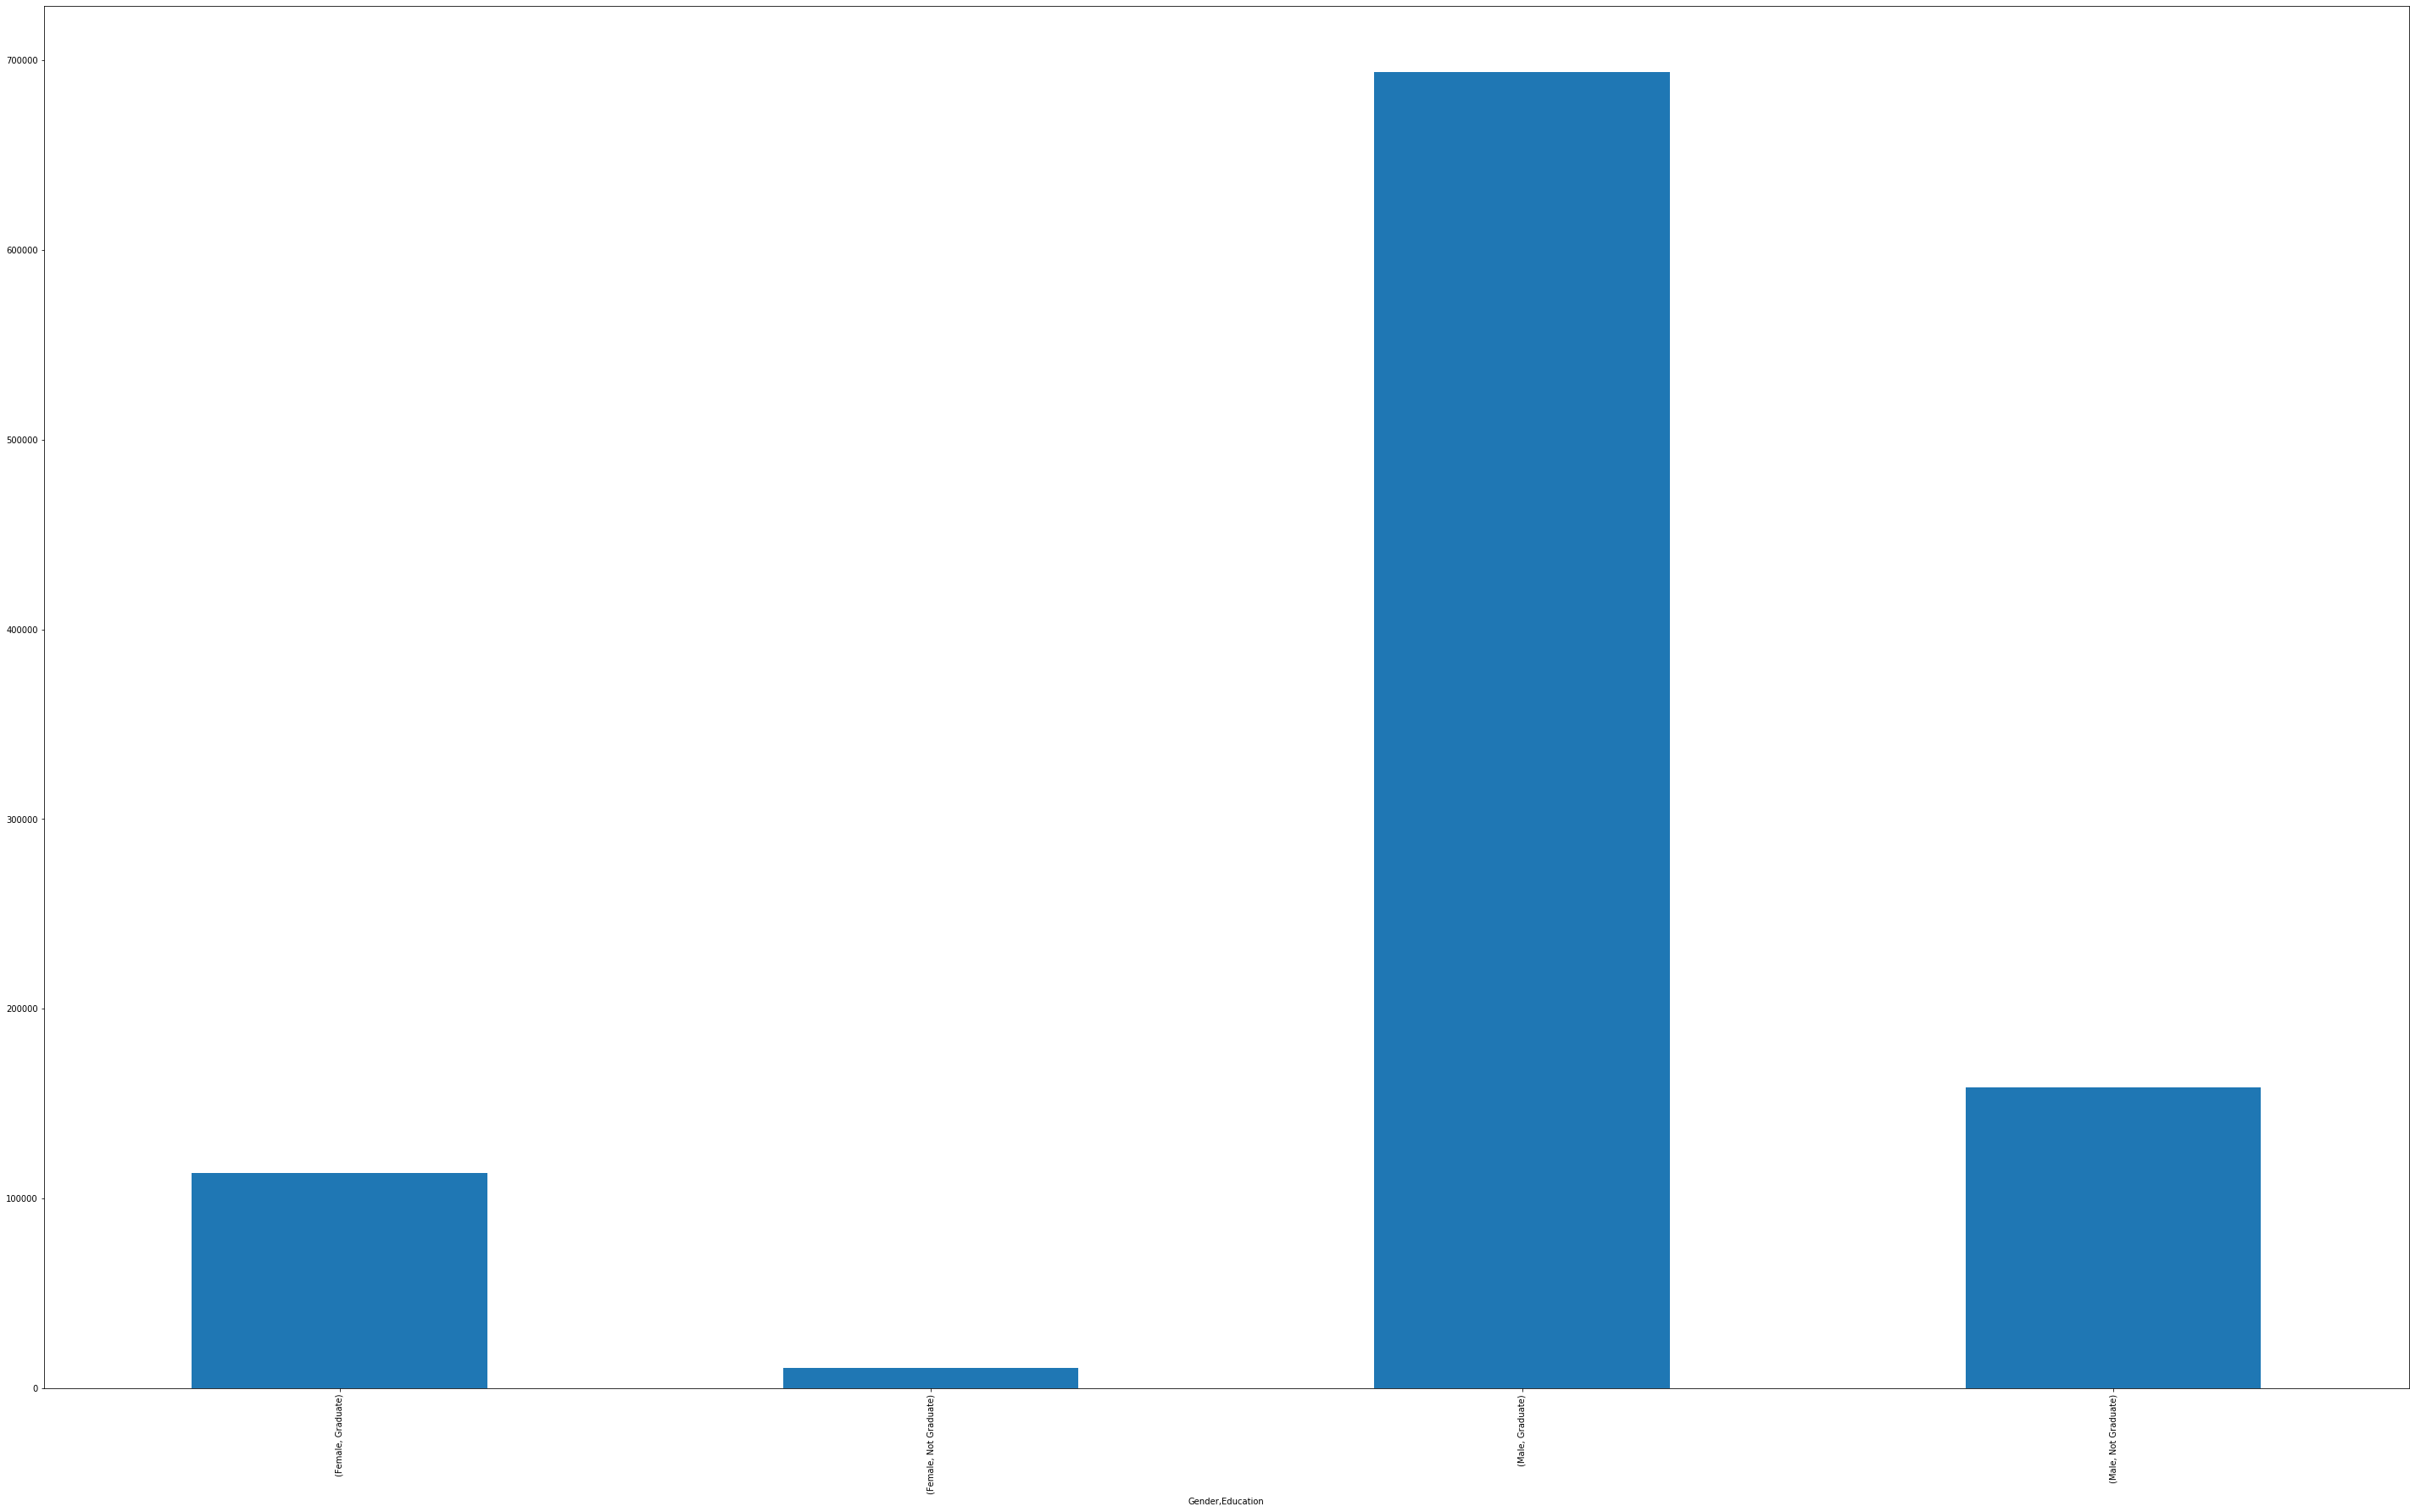

In [194]:
fig, ax = plt.subplots(figsize=(50,30))
df.groupby(["Gender","Education"]).sum()["CoapplicantIncome"].plot.bar(ax=ax)
df.groupby(["Gender","Education"]).sum()["CoapplicantIncome"].unstack()

Education,Graduate,Not Graduate
Gender,,
Female,427475,92594
Male,2253122,410197


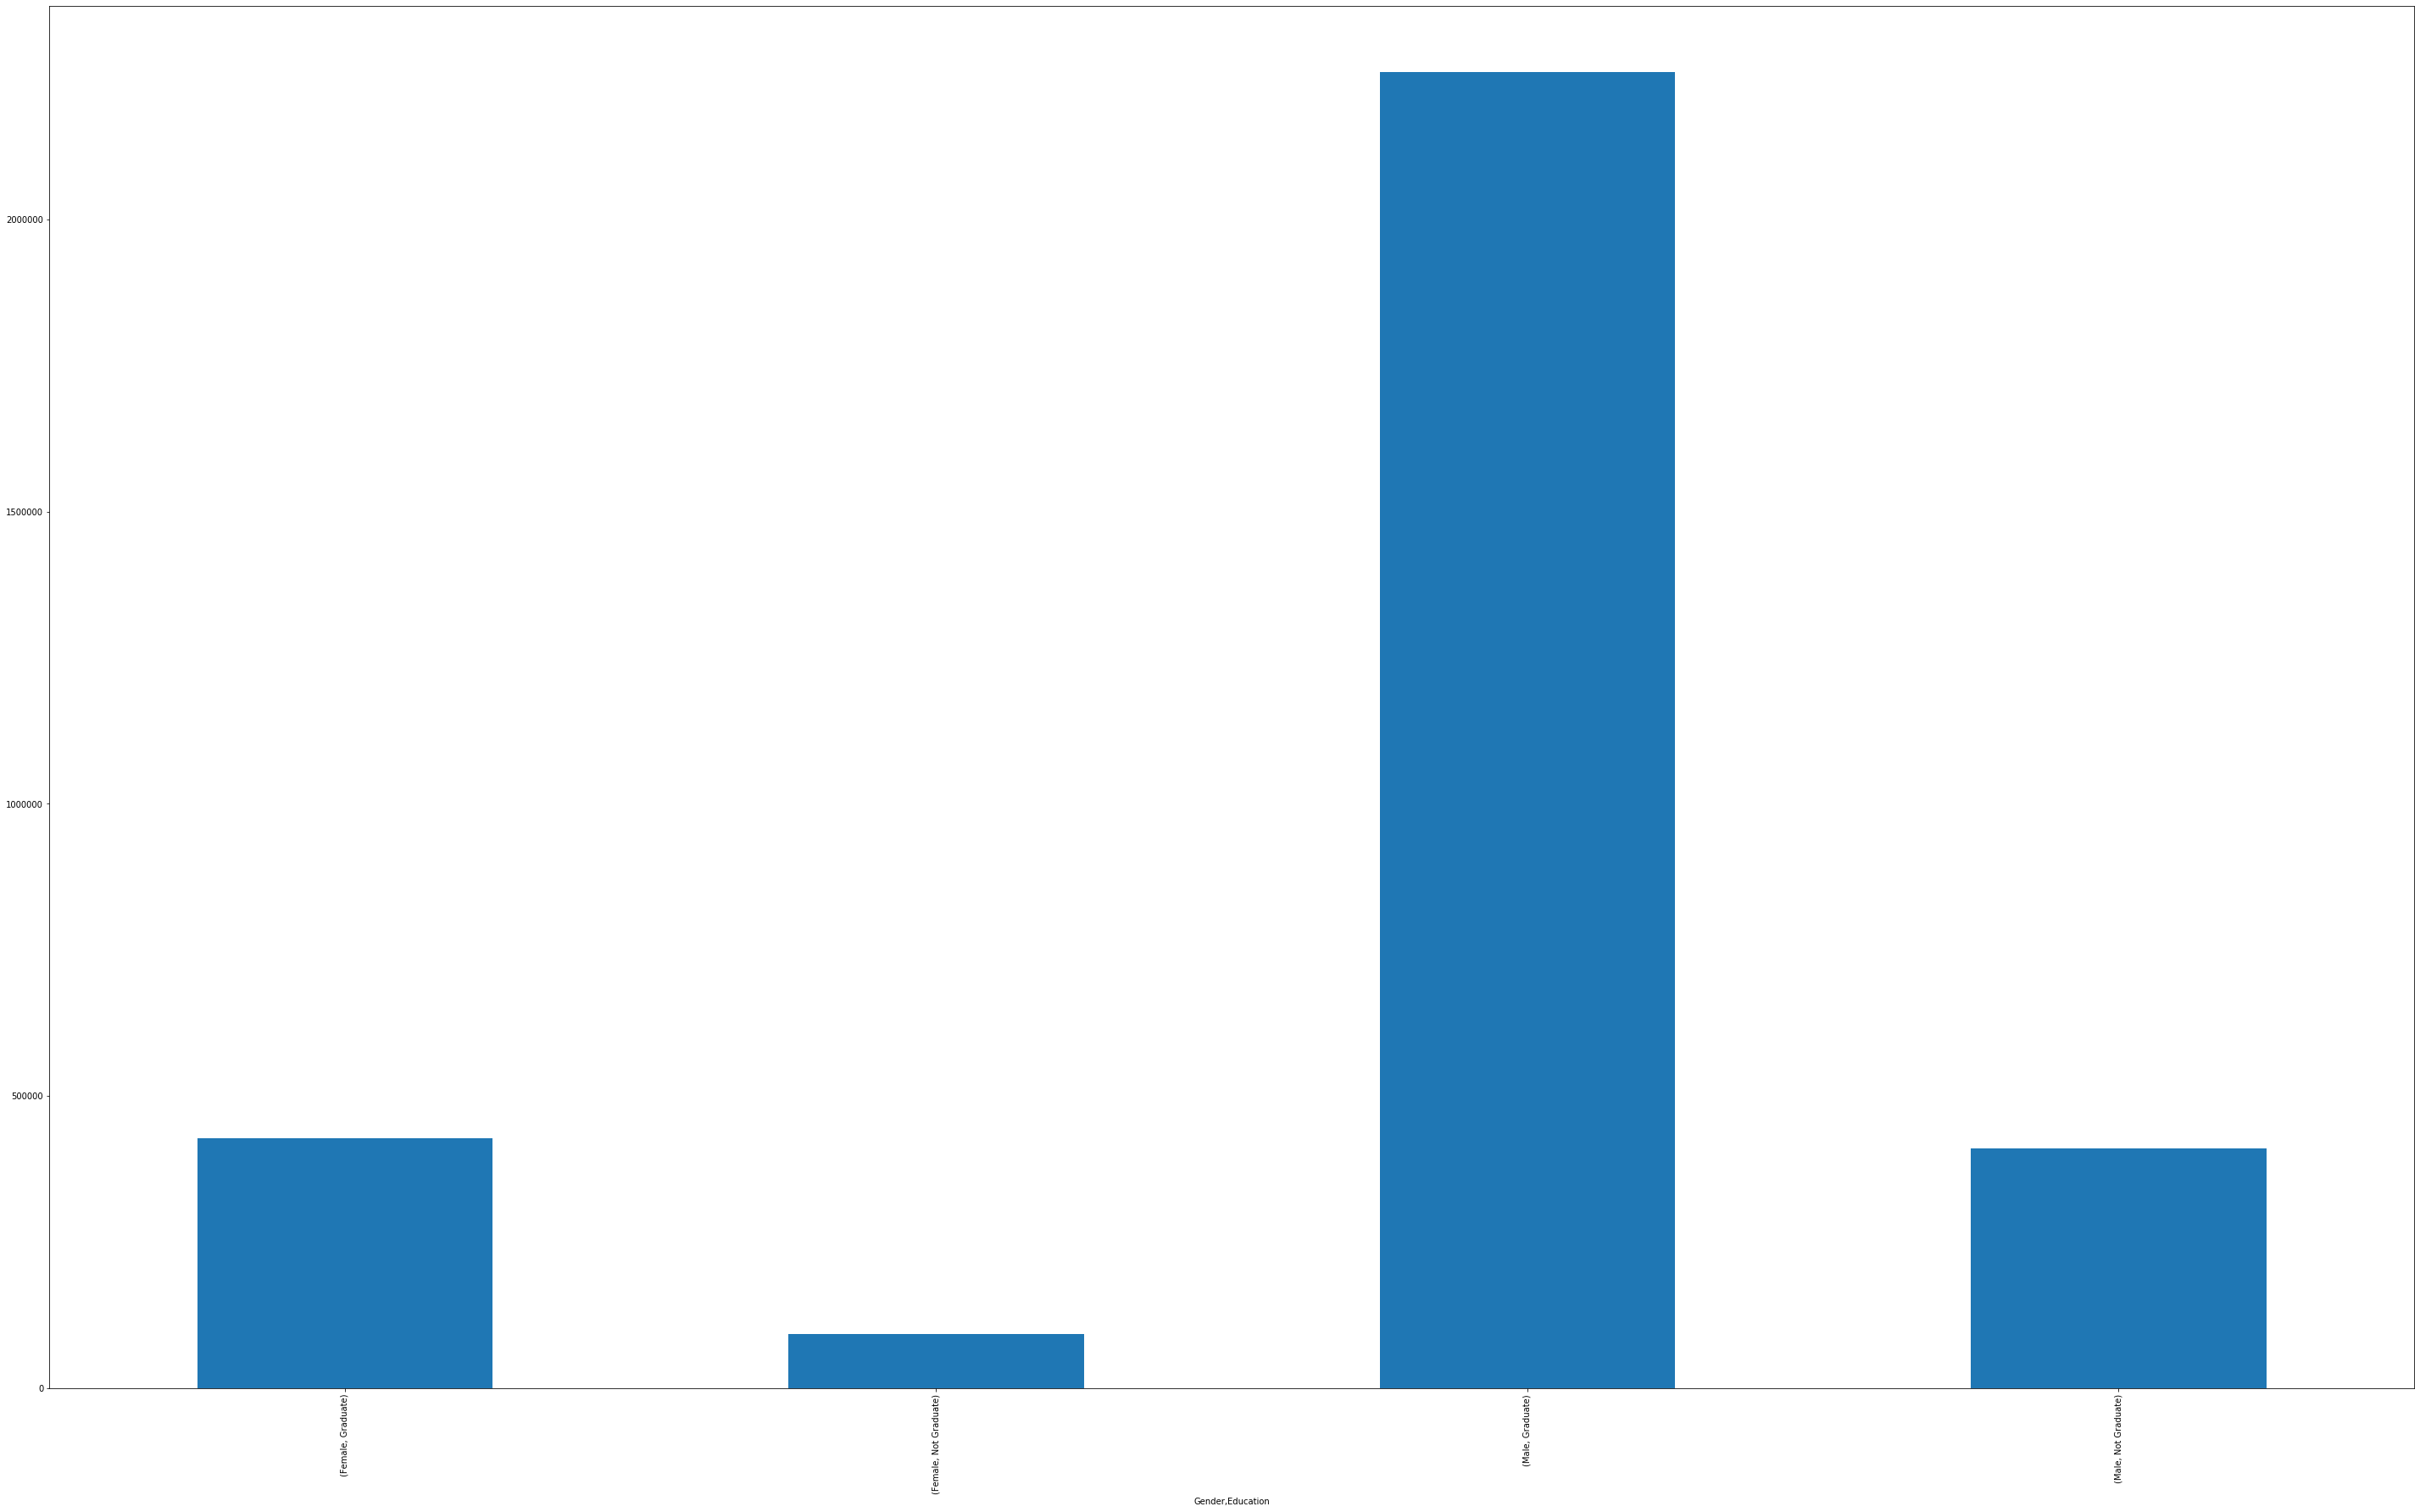

In [195]:
fig, ax = plt.subplots(figsize=(50,30))
df.groupby(["Gender","Education"]).sum()["ApplicantIncome"].plot.bar(ax=ax)
df.groupby(["Gender","Education"]).sum()["ApplicantIncome"].unstack()

In [196]:
cnt=0
cnt1=0
for i in df["Gender"]:
    if i=="Male":
        cnt+=1
    else:
        cnt1+=1
        
print(cnt,"Number of Male")
print(cnt1,"Number of Female")

489 Number of Male
125 Number of Female


 Max Income of Graduate and Non Graduate(Male/Female)


Education,Graduate,Not Graduate
Gender,,
Female,416,210
Male,150,1442


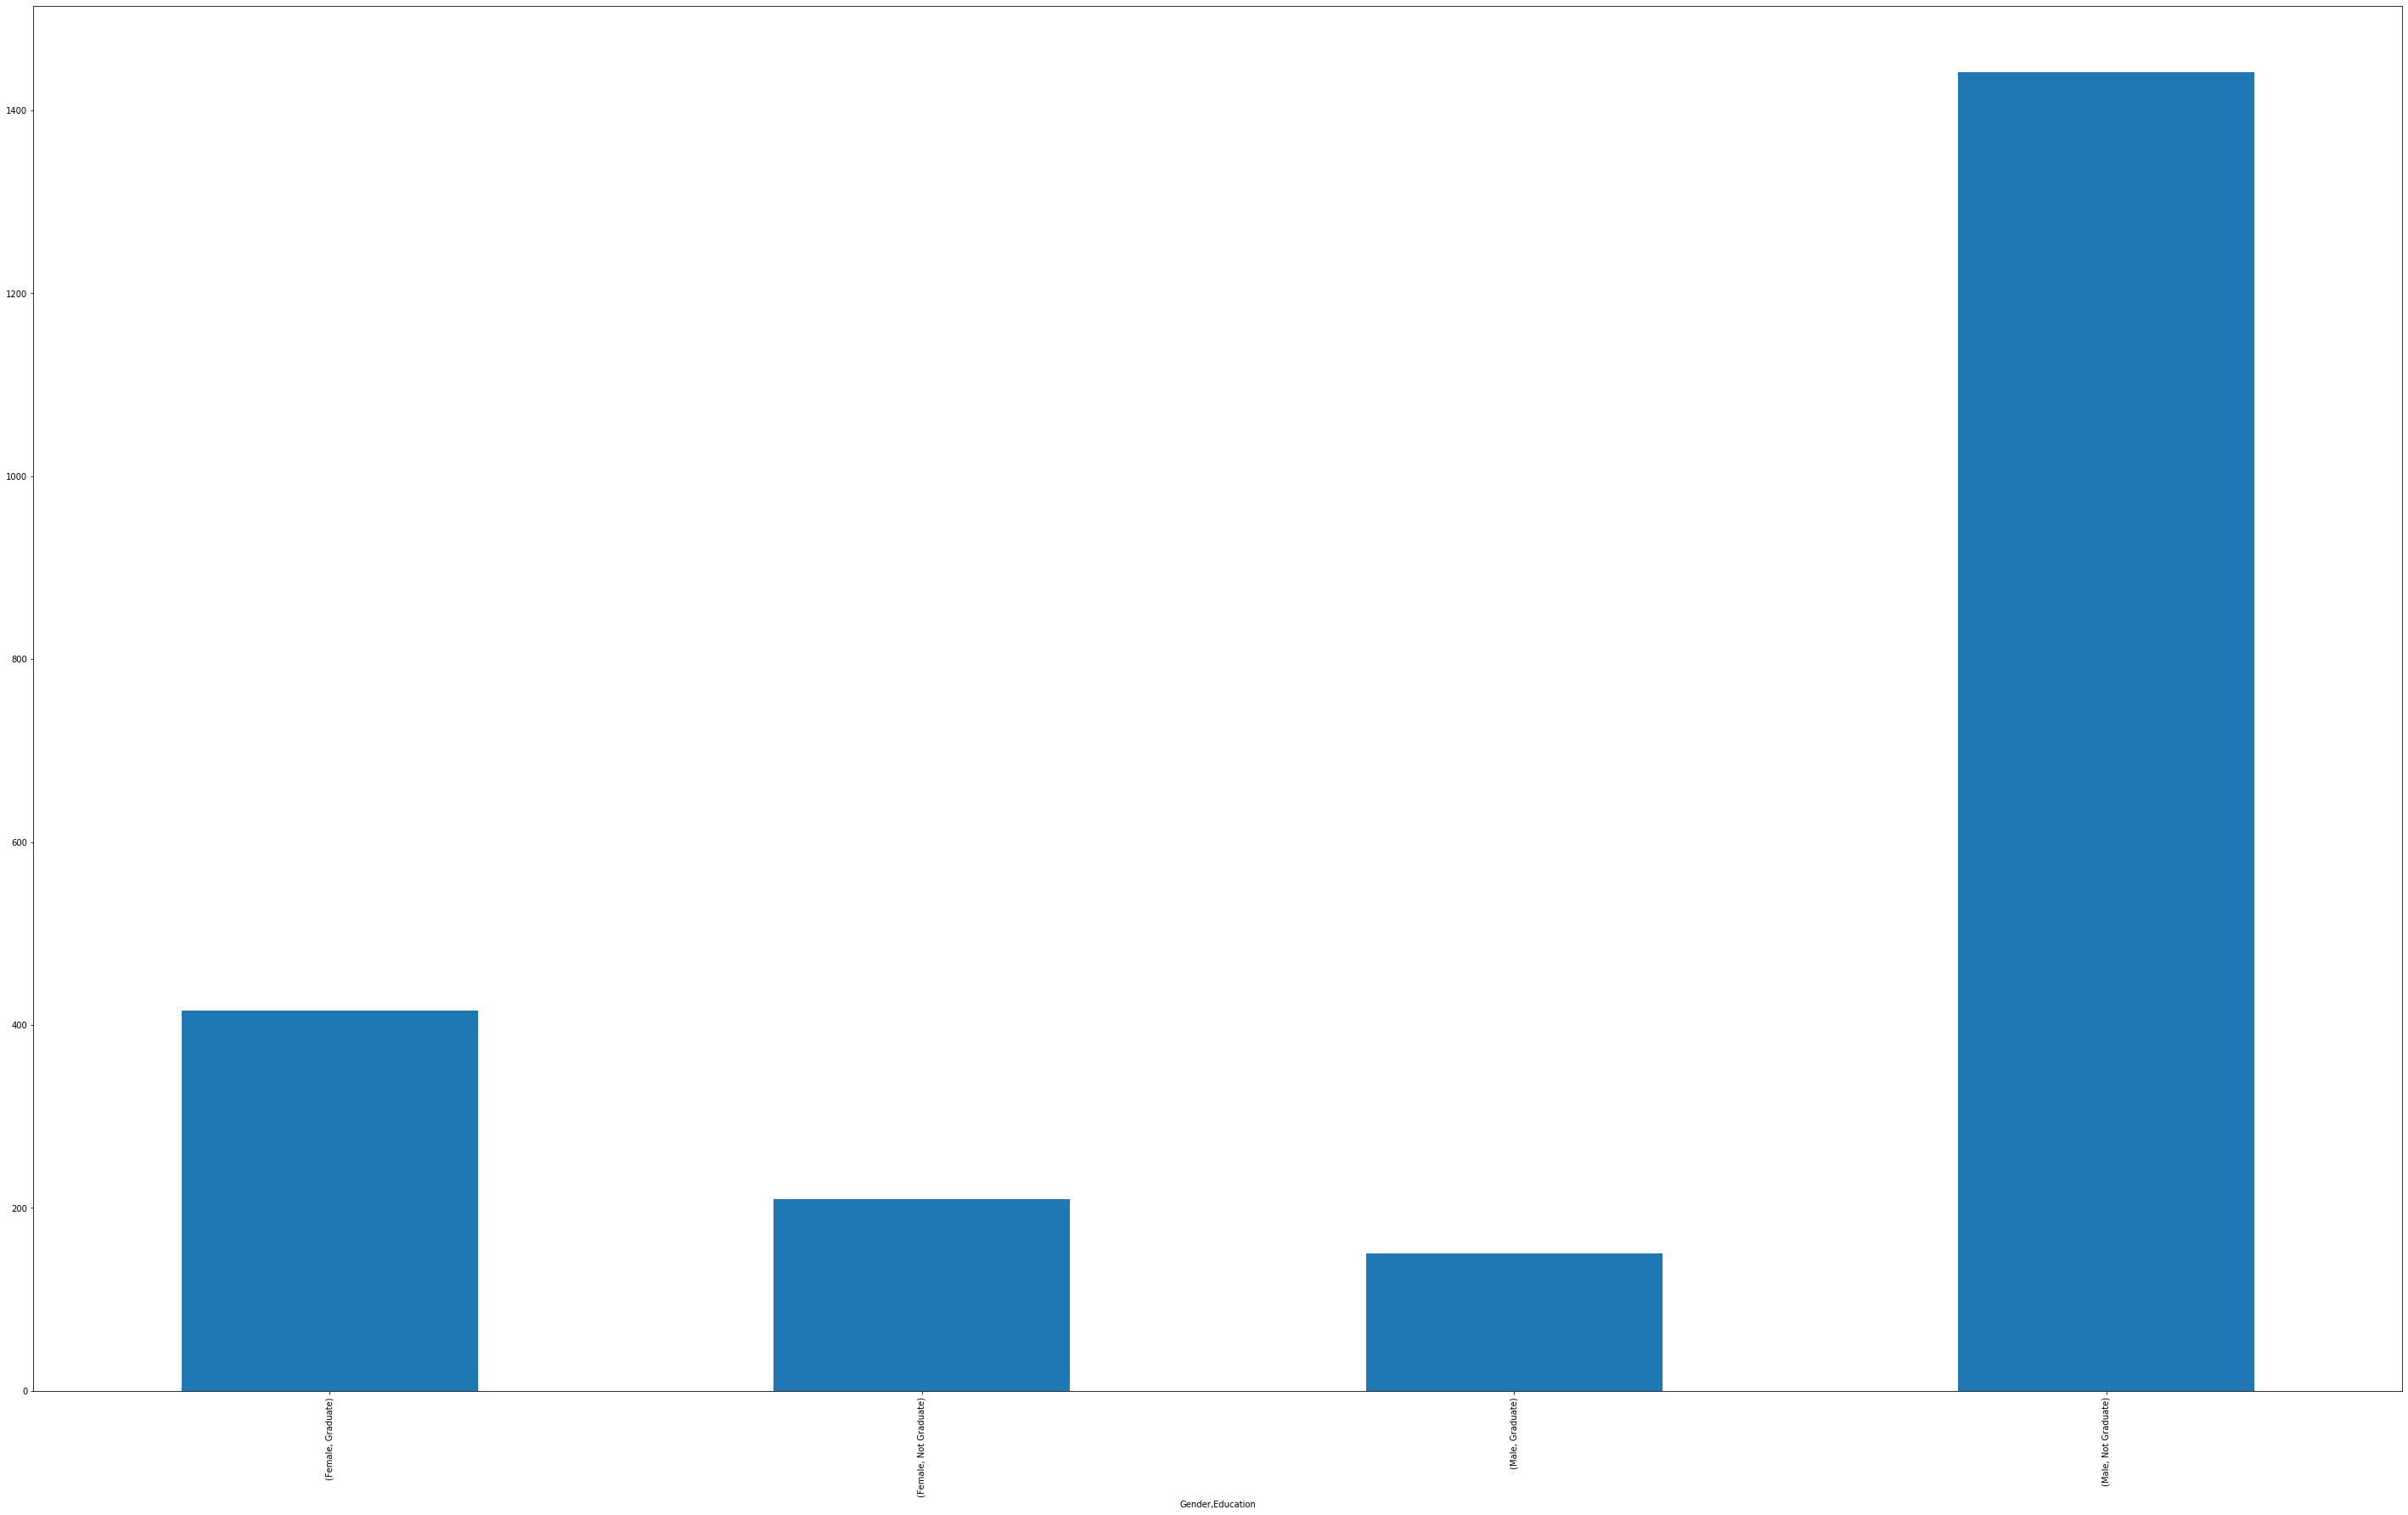

In [197]:
fig, ax = plt.subplots(figsize=(50,30))
df.groupby(["Gender","Education"]).min()["ApplicantIncome"].plot.bar(ax=ax)
df.groupby(["Gender","Education"]).min()["ApplicantIncome"].unstack()

In [198]:
income_min=df.groupby(["Gender","Education"]).min()["ApplicantIncome"].unstack()
income_max=df.groupby(["Gender","Education"]).max()["ApplicantIncome"].unstack()
coapp_income=df.groupby(["Gender","Education"]).sum()["CoapplicantIncome"].unstack()
app_income=df.groupby(["Gender","Education"]).sum()["ApplicantIncome"].unstack()

Normalizing the applicant income of male as well as female graduates

In [ ]:
x=pd.DataFrame(data=df,columns=['Gender','Education','ApplicantIncome',"Self_Employed"])

x ["ApplicantIncome"]= x["ApplicantIncome"].astype(float) 
x["Education"]=x["Education"].astype('category')
x["Gender"]=x["Gender"].astype('category')
for dumy,dumy1 in enumerate(df["Gender"]):
    if df["Gender"][dumy]=="Male" and df["Education"][dumy]=="Graduate":
        x["ApplicantIncome"][dumy]=(df["ApplicantIncome"][dumy]-income_min["Graduate"]["Male"])/(income_max["Graduate"]["Male"]-income_min["Graduate"]["Male"])
        
    elif df["Gender"][dumy]=="Male" and df["Education"][dumy]=="Not Graduate":
        x["ApplicantIncome"][dumy]=(df["ApplicantIncome"][dumy]-income_min["Not Graduate"]["Male"])/(income_max["Not Graduate"]["Male"]-income_min["Not Graduate"]["Male"])
        
    elif df["Gender"][dumy]=="Female" and df["Education"][dumy]=="Graduate":
        x["ApplicantIncome"][dumy]=(df["ApplicantIncome"][dumy]-income_min["Graduate"]["Female"])/(income_max["Graduate"]["Female"]-income_min["Graduate"]["Female"])
    else:
        x["ApplicantIncome"][dumy]=(df["ApplicantIncome"][dumy]-income_min["Not Graduate"]["Female"])/(income_max["Not Graduate"]["Female"]-income_min["Not Graduate"]["Female"])
        
   
    
   
    
    

In [200]:
x

,Gender,Education,ApplicantIncome,Self_Employed
0,Male,Graduate,0.070489,No
1,Male,Graduate,0.054830,No
2,Male,Graduate,0.035250,Yes
3,Male,Not Graduate,0.183293,No
4,Male,Graduate,0.072356,No
...,...,...,...,...
609,Female,Graduate,0.130271,No
610,Male,Graduate,0.048930,No
611,Male,Graduate,0.097984,No
612,Male,Graduate,0.091936,No


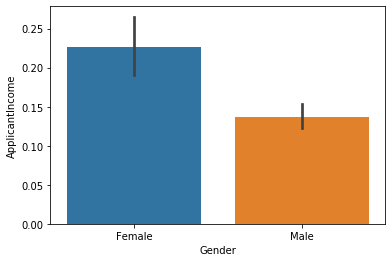

In [201]:
sns.barplot(x=x["Gender"],y=x["ApplicantIncome"])#After Normalization

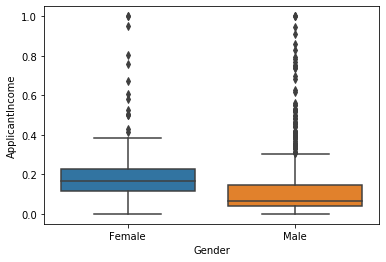

In [202]:
sns.boxplot(x=x["Gender"],y=x["ApplicantIncome"])

Mean Income of a Graduate (Male/Female)

In [203]:
income_mean=df.groupby(["Gender","Education"]).mean()["ApplicantIncome"].unstack()
df.groupby(["Gender","Education"]).mean()["ApplicantIncome"].unstack()

Education,Graduate,Not Graduate
Gender,,
Female,4646.467391,4629.700000
Male,5992.345745,3630.061947


In [204]:
p=np.std(income_mean,axis=0)

In [205]:
p#Deviation of a Graduate and non Graduates Income

Education
Graduate        672.939177
Not Graduate    499.819027
dtype: float64

In [206]:
p1=np.std(income_mean,axis=1)
p1#Deviation of Male and Female Income

Gender
Female       8.383696
Male      1181.141899
dtype: float64

In [207]:
df["Loan_ID"].nunique()

614

In [208]:
coapp_min=df.groupby(["Gender","Education"]).min()["CoapplicantIncome"].unstack()
coapp_max=df.groupby(["Gender","Education"]).max()["CoapplicantIncome"].unstack()

Normalizing the co-applicant income of male as well as female graduates

In [ ]:
x1=pd.DataFrame(data=df,columns=['Gender','Education','ApplicantIncome',"Self_Employed"])

x1 ["CoapplicantIncome"]= x["ApplicantIncome"].astype(float) 
x1["Education"]=x["Education"].astype('category')
x1["Gender"]=x["Gender"].astype('category')
for dumy,dumy1 in enumerate(df["Gender"]):
    if df["Gender"][dumy]=="Male" and df["Education"][dumy]=="Graduate":
        x1["CoapplicantIncome"][dumy]=(df["CoapplicantIncome"][dumy]-coapp_min["Graduate"]["Male"])/(coapp_max["Graduate"]["Male"]-coapp_min["Graduate"]["Male"])
        
    elif df["Gender"][dumy]=="Male" and df["Education"][dumy]=="Not Graduate":
        x1["CoapplicantIncome"][dumy]=(df["CoapplicantIncome"][dumy]-coapp_min["Not Graduate"]["Male"])/(coapp_max["Not Graduate"]["Male"]-coapp_min["Not Graduate"]["Male"])
        
    elif df["Gender"][dumy]=="Female" and df["Education"][dumy]=="Graduate":
        x1["CoapplicantIncome"][dumy]=(df["CoapplicantIncome"][dumy]-coapp_min["Graduate"]["Female"])/(coapp_max["Graduate"]["Female"]-coapp_min["Graduate"]["Female"])
    else:
        x1["CoapplicantIncome"][dumy]=(df["CoapplicantIncome"][dumy]-coapp_min["Not Graduate"]["Female"])/(coapp_max["Not Graduate"]["Female"]-coapp_min["Not Graduate"]["Female"])
        
   
    
   
    
    

In [210]:
cnt=0
for i in df["Self_Employed"]:
    if i=="No":
        cnt+=1
    
print(cnt)
df["Self_Employed"].nunique  

500


<bound method IndexOpsMixin.nunique of 0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: category
Categories (2, object): [No < Yes]>

Education
Graduate        454
Not Graduate    128
Name: Self_Employed, dtype: int64

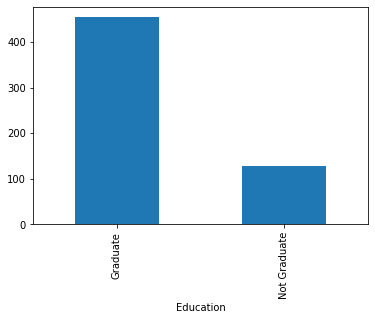

In [211]:
df.groupby(["Education"]).count()["Self_Employed"].plot.bar()
df.groupby(["Education"]).count()["Self_Employed"]

Graduates who are self employed(Male/Female)

Education             Graduate  Not Graduate
Gender Self_Employed                        
Female No                   75            14
       Yes                  11             4
Male   No                  306            96
       Yes                  50            13

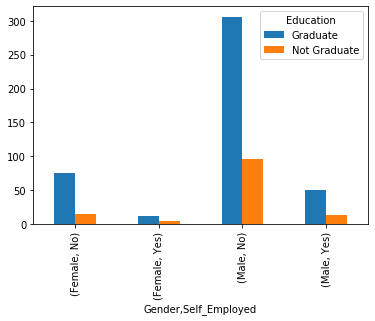

In [212]:
df.groupby(["Gender","Self_Employed","Education"]).count()["Loan_ID"].unstack().plot.bar()
df.groupby(["Gender","Self_Employed","Education"]).count()["Loan_ID"].unstack()

Mean Income of males and females(Graduates/Not Graduate)

Self_Employed                 No           Yes
Gender Education                              
Female Graduate      4288.546667   8082.272727
       Not Graduate  2911.142857  11609.250000
Male   Graduate      5589.771242   7839.120000
       Not Graduate  3537.687500   4306.307692

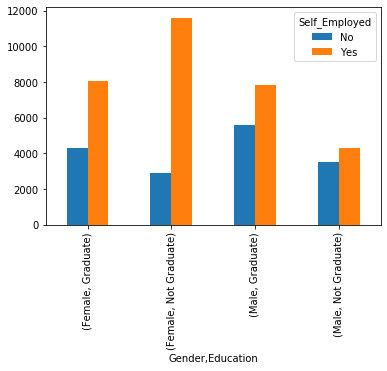

In [213]:
df.groupby(["Gender","Education","Self_Employed"]).mean()["ApplicantIncome"].unstack().plot.bar()
df.groupby(["Gender","Education","Self_Employed"]).mean()["ApplicantIncome"].unstack()

Deviation of Income of the graduates and non graduates

In [214]:
df.groupby(["Gender","Education","Self_Employed"]).std()["ApplicantIncome"].unstack()

Self_Employed                 No          Yes
Gender Education                             
Female Graduate      2679.032829  5506.209188
       Not Graduate  1057.982395  7184.276924
Male   Graduate      6349.917354  6421.968395
       Not Graduate  1320.974993  1627.170877

In [215]:
df.groupby(["Gender","Education","Self_Employed"]).std()["CoapplicantIncome"].unstack()

Self_Employed                 No          Yes
Gender Education                             
Female Graduate      1493.865034   517.694979
       Not Graduate  1065.027227     0.000000
Male   Graduate      2873.226706  3337.190747
       Not Graduate  1345.432369  1170.926025

Self_Employed              No       Yes
Gender Education                       
Female Graduate      0.140499  0.288767
       Not Graduate  0.058924  0.400127
Male   Graduate      0.078539  0.079431
       Not Graduate  0.212205  0.261393

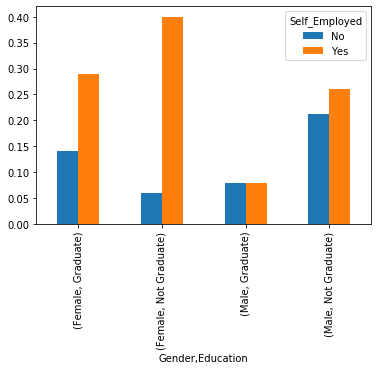

In [216]:
x.groupby(["Gender","Education","Self_Employed"]).std()["ApplicantIncome"].unstack().plot.bar()
x.groupby(["Gender","Education","Self_Employed"]).std()["ApplicantIncome"].unstack()

Deviation of Co-applicant Income

Self_Employed              No       Yes
Gender Education                       
Female Graduate      0.035852  0.012425
       Not Graduate  0.329017  0.000000
Male   Graduate      0.084914  0.098625
       Not Graduate  0.189471  0.164896

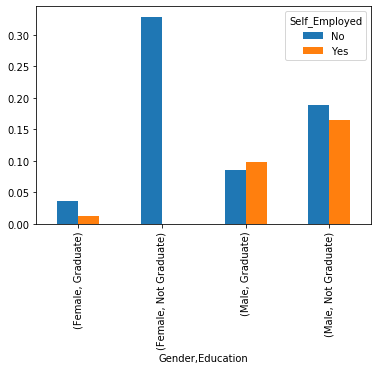

In [217]:
x1.groupby(["Gender","Education","Self_Employed"]).std()["CoapplicantIncome"].unstack().plot.bar()
x1.groupby(["Gender","Education","Self_Employed"]).std()["CoapplicantIncome"].unstack()

In [218]:
df2,y,nas=proc_df(df,"Loan_Status")
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_na,Loan_Amount_Term_na,Credit_History_na
0,1,2,1,1,1,1,5849,0.0,128.0,360.0,1.0,3,True,False,False
1,2,2,2,2,1,1,4583,1508.0,128.0,360.0,1.0,1,False,False,False
2,3,2,2,1,1,2,3000,0.0,66.0,360.0,1.0,3,False,False,False
3,4,2,2,1,2,1,2583,2358.0,120.0,360.0,1.0,3,False,False,False
4,5,2,1,1,1,1,6000,0.0,141.0,360.0,1.0,3,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,610,1,1,1,1,1,2900,0.0,71.0,360.0,1.0,1,False,False,False
610,611,2,2,4,1,1,4106,0.0,40.0,180.0,1.0,1,False,False,False
611,612,2,2,2,1,1,8072,240.0,253.0,360.0,1.0,3,False,False,False
612,613,2,2,3,1,1,7583,0.0,187.0,360.0,1.0,3,False,False,False


Mean Loan Amount per term(Male/Female)

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Gender,,,,,,,,,,
Female,NaN,155.0,NaN,105.000000,NaN,202.000000,NaN,99.000000,125.385417,130.000000
Male,111.0,80.0,140.0,141.333333,22.333333,142.315789,118.333333,146.181818,152.139896,159.727273


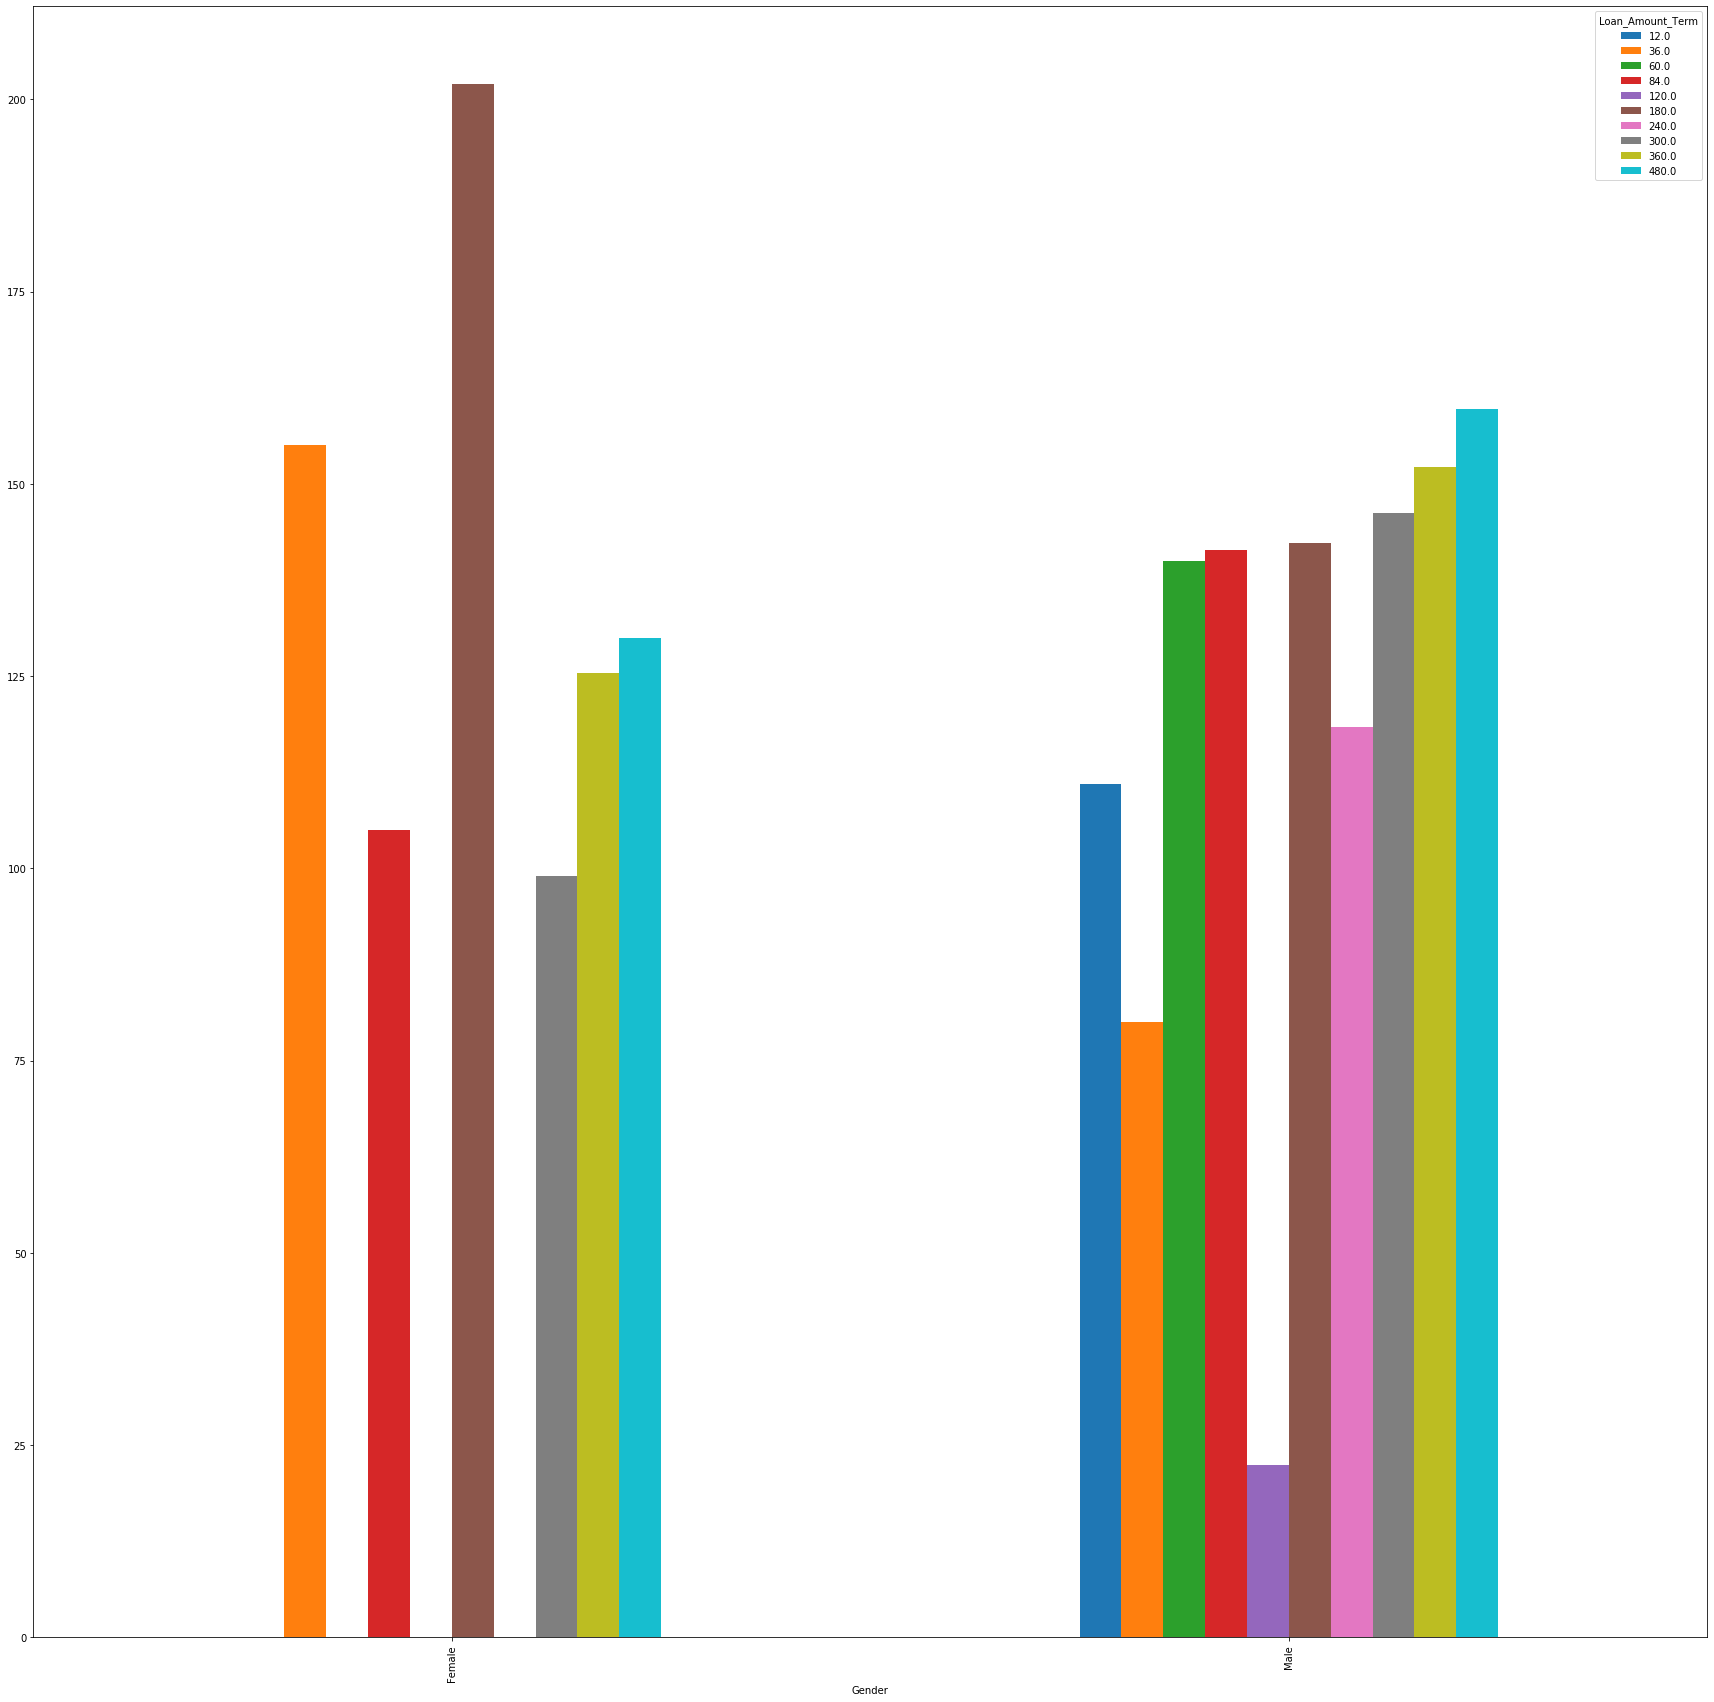

In [219]:
fig, ax = plt.subplots(figsize=(30,30))
df.groupby(["Gender","Loan_Amount_Term"]).mean()["LoanAmount"].unstack().plot.bar(ax=ax)
df.groupby(["Gender","Loan_Amount_Term"]).mean()["LoanAmount"].unstack()

Mean Loan Amount for Graduates and Non Graduates

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Education,,,,,,,,,,
Graduate,111.0,155.0,155.0,132.25,21.0,161.000000,127.5,215.8,153.56927,163.090909
Not Graduate,NaN,80.0,125.0,NaN,25.0,120.571429,100.0,83.0,121.09375,120.750000


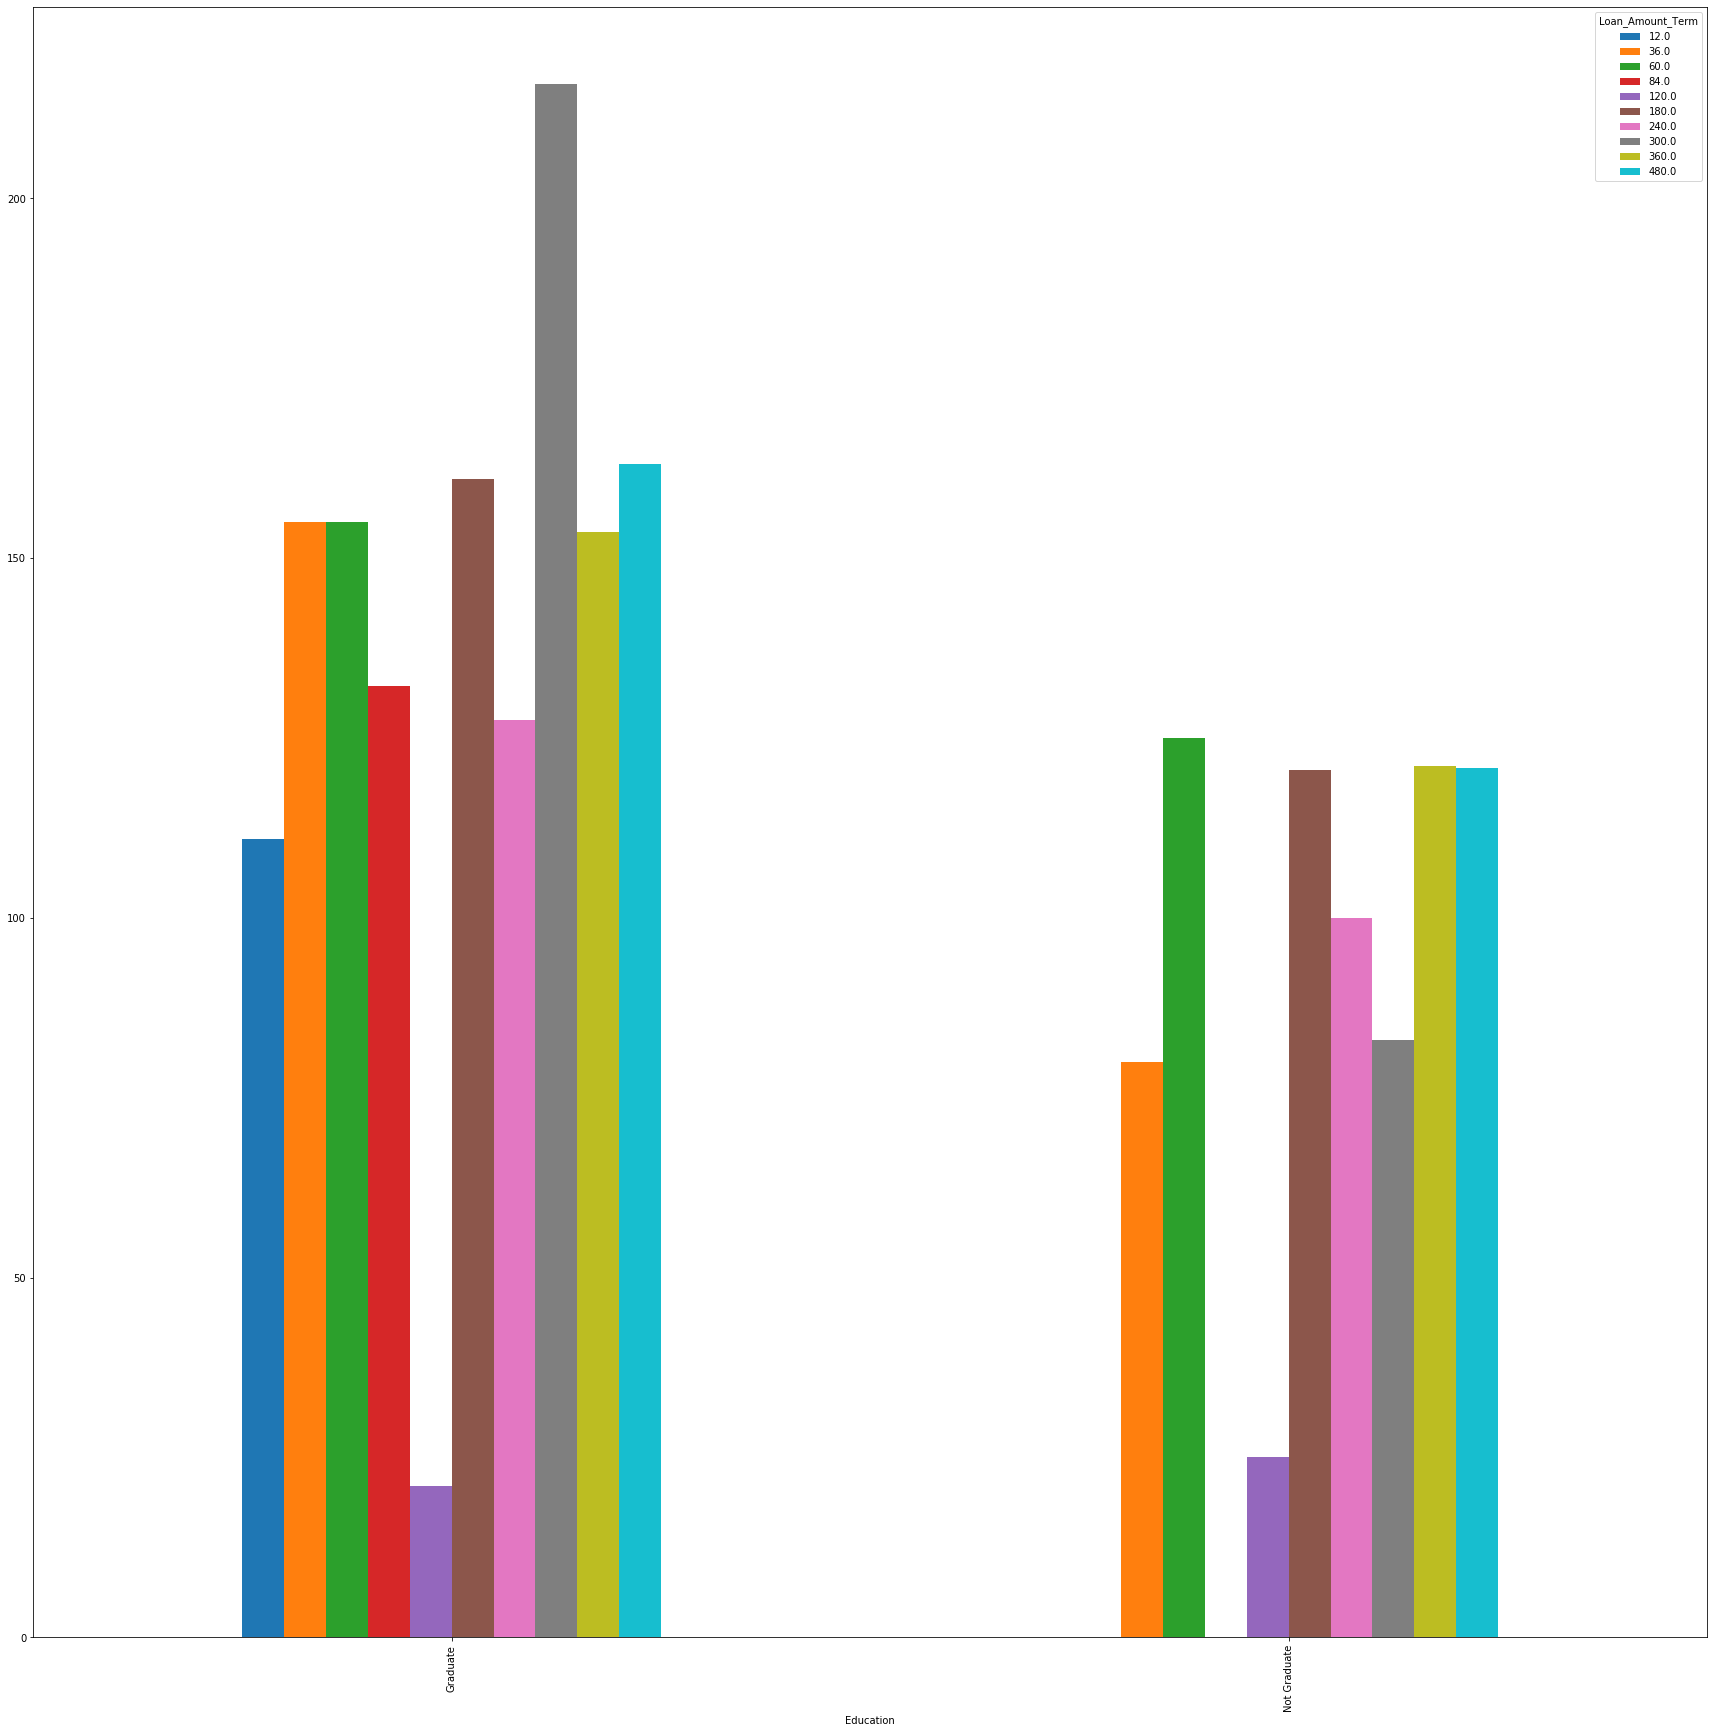

In [220]:
fig, ax = plt.subplots(figsize=(30,30))
df.groupby(["Education","Loan_Amount_Term"]).mean()["LoanAmount"].unstack().plot.bar(ax=ax)
df.groupby(["Education","Loan_Amount_Term"]).mean()["LoanAmount"].unstack()

In [221]:
nas

{'LoanAmount': 128.0, 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0}

In [222]:
def RF(df,Xtest3,ytest3):
    predictions3 = clf1.predict(X_test3)
    m=metrics.accuracy_score(y_test3, predictions3)
    return m

In [223]:
clf1=RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.5,max_depth=2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df2,y,test_size=0.33,shuffle=True,random_state=42)
clf1.fit(X_train3,y_train3)
print("Accuracy:",RF(df2,X_test3,y_test3))

Accuracy: 0.7980295566502463


In [224]:
fi=rf_feat_importance(clf1,df2)

In [225]:
def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

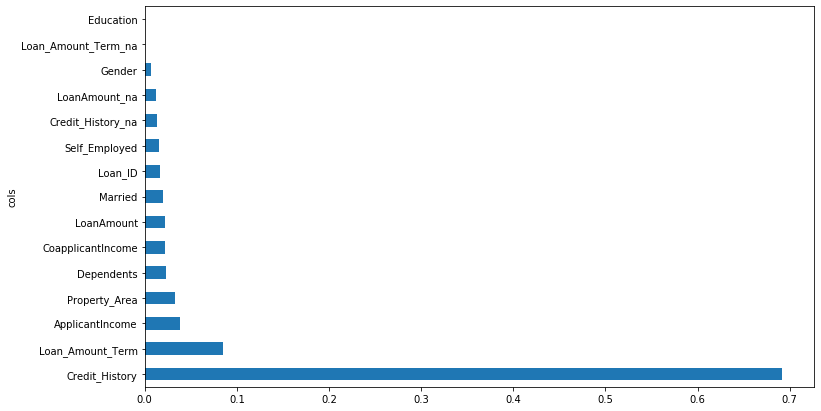

In [226]:
plot_fi(fi)

In [227]:
# Correlation Function
def correlate(df2):
    corr = np.round(scipy.stats.spearmanr(df2).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(16,10))
    dendrogram = hc.dendrogram(z, labels=df2.columns, orientation='left', leaf_font_size=16)
    plt.show()

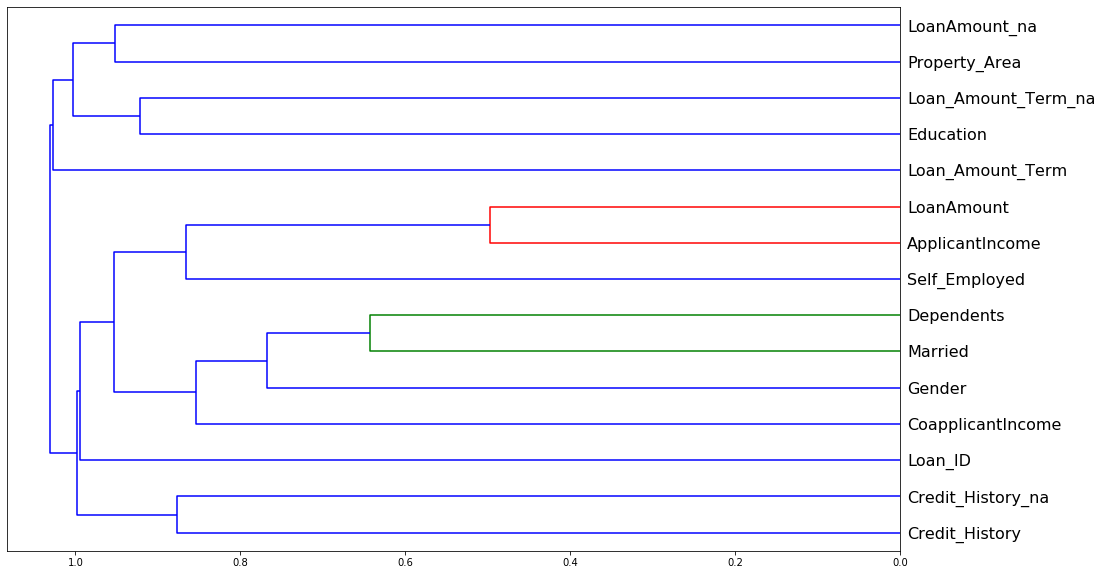

In [228]:
correlate(df2)

In [229]:
fi

,cols,imp
10,Credit_History,0.692002
9,Loan_Amount_Term,0.084876
6,ApplicantIncome,0.037804
11,Property_Area,0.033274
3,Dependents,0.023324
7,CoapplicantIncome,0.022553
8,LoanAmount,0.021733
2,Married,0.019571
0,Loan_ID,0.016118
5,Self_Employed,0.015244


In [230]:
to_keep = fi[fi.imp>0.010].cols;

In [231]:
to_keep
df_to_keep=df2[to_keep].copy()
h=df_to_keep.copy()
h.drop(["Loan_ID"],axis=1,inplace=True)
h

,Credit_History,Loan_Amount_Term,ApplicantIncome,Property_Area,Dependents,CoapplicantIncome,LoanAmount,Married,Self_Employed,Credit_History_na,LoanAmount_na
0,1.0,360.0,5849,3,1,0.0,128.0,1,1,False,True
1,1.0,360.0,4583,1,2,1508.0,128.0,2,1,False,False
2,1.0,360.0,3000,3,1,0.0,66.0,2,2,False,False
3,1.0,360.0,2583,3,1,2358.0,120.0,2,1,False,False
4,1.0,360.0,6000,3,1,0.0,141.0,1,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,360.0,2900,1,1,0.0,71.0,1,1,False,False
610,1.0,180.0,4106,1,4,0.0,40.0,2,1,False,False
611,1.0,360.0,8072,3,2,240.0,253.0,2,1,False,False
612,1.0,360.0,7583,3,3,0.0,187.0,2,1,False,False


In [232]:
clf1=RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.5,max_depth=2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_to_keep,y,test_size=0.33,shuffle=True,random_state=42)
clf1.fit(X_train3,y_train3)
print("Accuracy after dropping least important columns(Random Forest):",RF(df_to_keep,X_test3,y_test3))

Accuracy after dropping least important columns(Random Forest): 0.7980295566502463


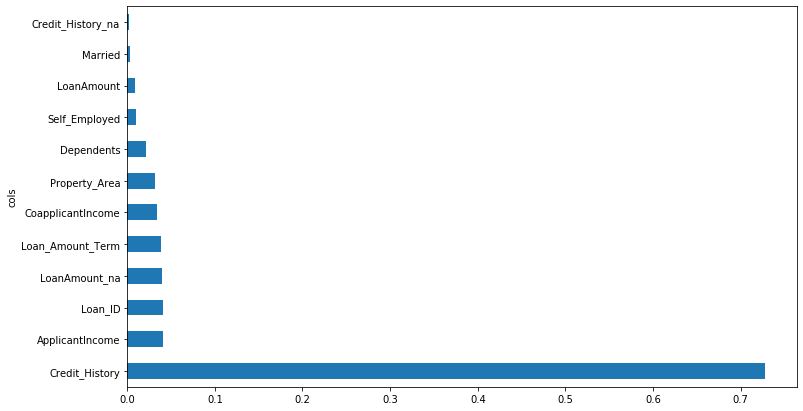

In [233]:
fi=rf_feat_importance(clf1,df_to_keep)
plot_fi(fi)

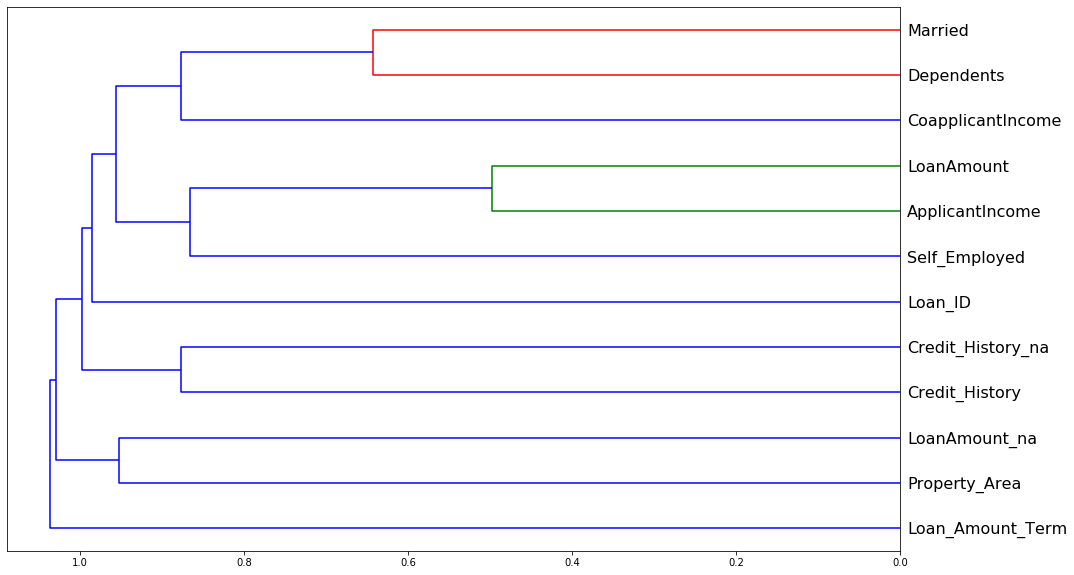

In [234]:
correlate(df_to_keep)

In [235]:
df_dummy=df2.copy()

In [236]:
df_dummy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_na,Loan_Amount_Term_na,Credit_History_na
0,1,2,1,1,1,1,5849,0.0,128.0,360.0,1.0,3,True,False,False
1,2,2,2,2,1,1,4583,1508.0,128.0,360.0,1.0,1,False,False,False
2,3,2,2,1,1,2,3000,0.0,66.0,360.0,1.0,3,False,False,False
3,4,2,2,1,2,1,2583,2358.0,120.0,360.0,1.0,3,False,False,False
4,5,2,1,1,1,1,6000,0.0,141.0,360.0,1.0,3,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,610,1,1,1,1,1,2900,0.0,71.0,360.0,1.0,1,False,False,False
610,611,2,2,4,1,1,4106,0.0,40.0,180.0,1.0,1,False,False,False
611,612,2,2,2,1,1,8072,240.0,253.0,360.0,1.0,3,False,False,False
612,613,2,2,3,1,1,7583,0.0,187.0,360.0,1.0,3,False,False,False


In [237]:
df_dummy.drop(["Credit_History","Credit_History_na"],axis=1,inplace=True)
df_dummy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,LoanAmount_na,Loan_Amount_Term_na
0,1,2,1,1,1,1,5849,0.0,128.0,360.0,3,True,False
1,2,2,2,2,1,1,4583,1508.0,128.0,360.0,1,False,False
2,3,2,2,1,1,2,3000,0.0,66.0,360.0,3,False,False
3,4,2,2,1,2,1,2583,2358.0,120.0,360.0,3,False,False
4,5,2,1,1,1,1,6000,0.0,141.0,360.0,3,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,610,1,1,1,1,1,2900,0.0,71.0,360.0,1,False,False
610,611,2,2,4,1,1,4106,0.0,40.0,180.0,1,False,False
611,612,2,2,2,1,1,8072,240.0,253.0,360.0,3,False,False
612,613,2,2,3,1,1,7583,0.0,187.0,360.0,3,False,False


In [239]:
clf1=RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.5,max_depth=2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_dummy,y,test_size=0.33,shuffle=True,random_state=42)
clf1.fit(X_train3,y_train3)
print("Accuracy after dropping credit related data(Random Forest):",RF(df_dummy,X_test3,y_test3))

Accuracy after dropping credit related data(Random Forest): 0.645320197044335


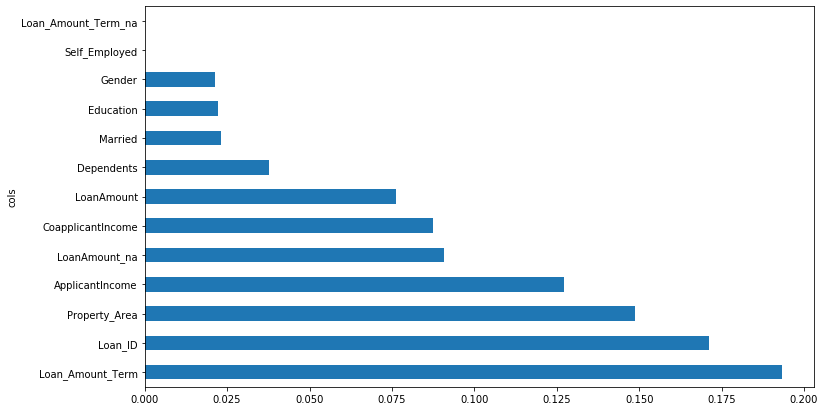

In [240]:
fi=rf_feat_importance(clf3,df_dummy)
plot_fi(fi)

In [241]:
df_dummy2=df_dummy.copy()
df_dummy2.drop("Loan_ID",axis=1,inplace=True)
df_dummy2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,LoanAmount_na,Loan_Amount_Term_na
0,2,1,1,1,1,5849,0.0,128.0,360.0,3,True,False
1,2,2,2,1,1,4583,1508.0,128.0,360.0,1,False,False
2,2,2,1,1,2,3000,0.0,66.0,360.0,3,False,False
3,2,2,1,2,1,2583,2358.0,120.0,360.0,3,False,False
4,2,1,1,1,1,6000,0.0,141.0,360.0,3,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,1,1,1,2900,0.0,71.0,360.0,1,False,False
610,2,2,4,1,1,4106,0.0,40.0,180.0,1,False,False
611,2,2,2,1,1,8072,240.0,253.0,360.0,3,False,False
612,2,2,3,1,1,7583,0.0,187.0,360.0,3,False,False


In [242]:
clf1=RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.5,max_depth=2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_dummy2,y,test_size=0.33,shuffle=True,random_state=42)
clf1.fit(X_train3,y_train3)
print("Accuracy after dropping credit related data and LoanID(Random Forest):",RF(df_dummy2,X_test3,y_test3))

Accuracy after dropping credit related data and LoanID(Random Forest): 0.645320197044335


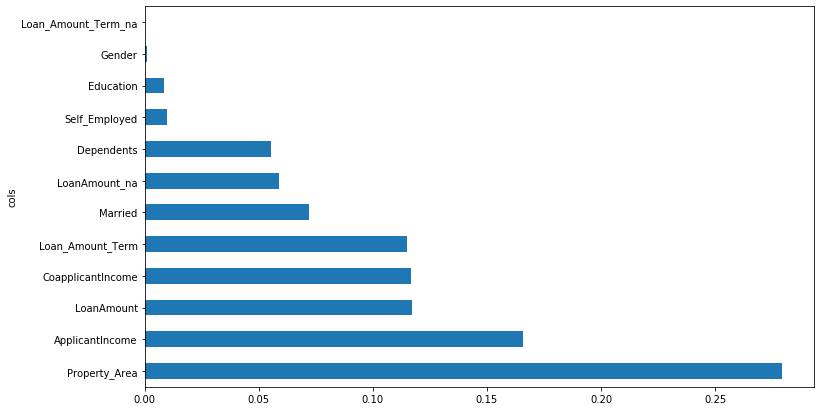

In [243]:
fi=rf_feat_importance(clf1,df_dummy2)
plot_fi(fi)

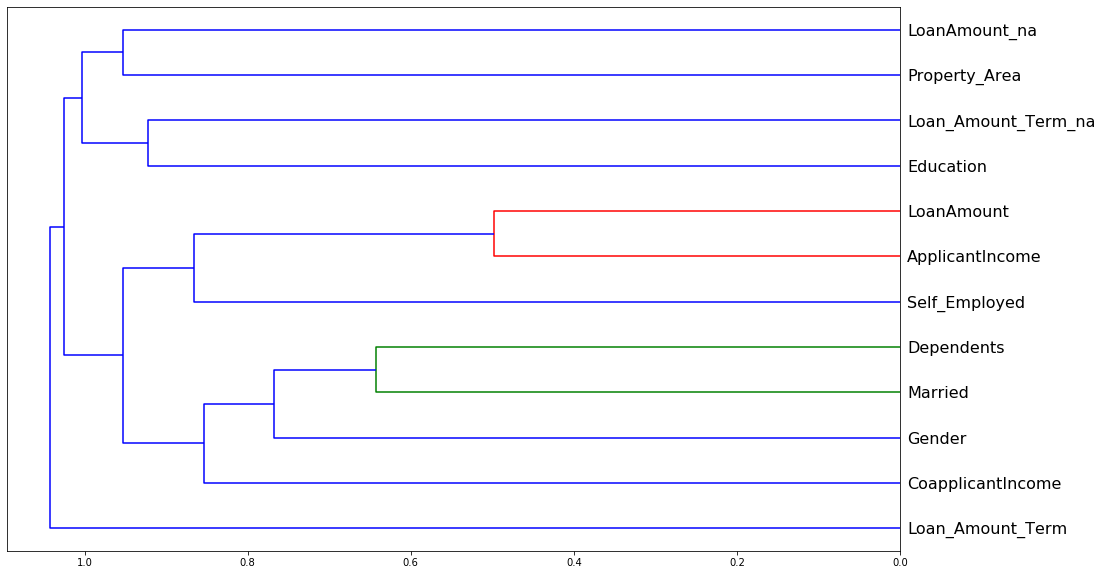

In [244]:
correlate(df_dummy2)

In [245]:
df_dummy3=df_dummy2.copy()
df_dummy3.drop(["Loan_Amount_Term_na","LoanAmount_na"],axis=1,inplace=True)

In [246]:
clf1=RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.5,max_depth=2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_dummy3,y,test_size=0.33,shuffle=True,random_state=42)
clf1.fit(X_train3,y_train3)
print("Accuracy after dropping credit related data,LoanID,Loan_Amount_Term_na(Random Forest):",RF(df_dummy3,X_test3,y_test3))

Accuracy after dropping credit related data,LoanID,Loan_Amount_Term_na(Random Forest): 0.6403940886699507


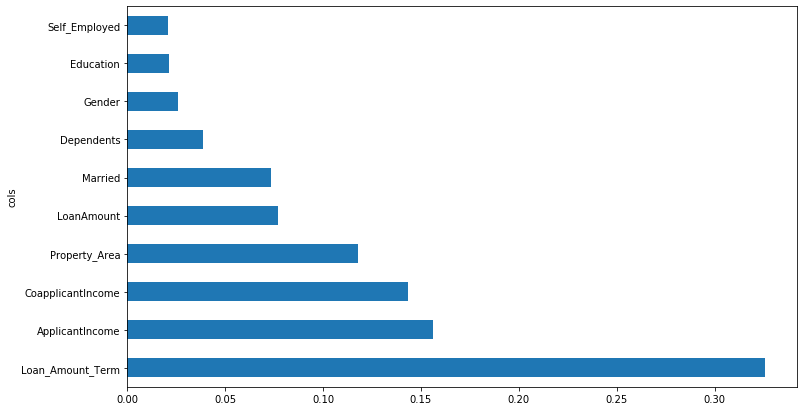

In [247]:
fi=rf_feat_importance(clf1,df_dummy3)
plot_fi(fi)

Loan Acceptance for Male and Females

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


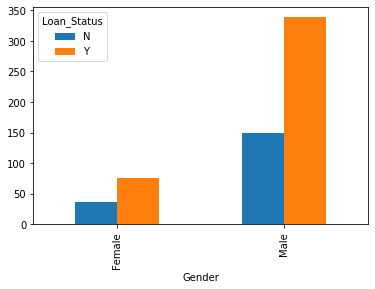

In [248]:
df.groupby(["Gender","Loan_Status"]).count()["Loan_ID"].unstack().plot.bar()
df.groupby(["Gender","Loan_Status"]).count()["Loan_ID"].unstack()

Loan Acceptance for Graduates and Non Graduates

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


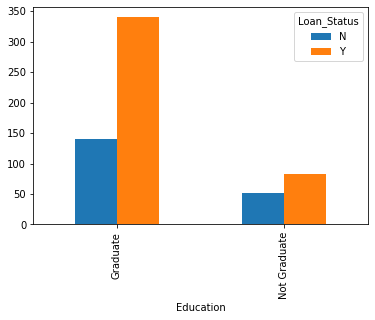

In [249]:
df.groupby(["Education","Loan_Status"]).count()["Loan_ID"].unstack().plot.bar()
df.groupby(["Education","Loan_Status"]).count()["Loan_ID"].unstack()

Loan Acceptance for Graduates and Non Graduates(Male/Female)

Loan_Status            N    Y
Education    Gender          
Graduate     Female   31   61
             Male    105  271
Not Graduate Female    6   14
             Male     45   68

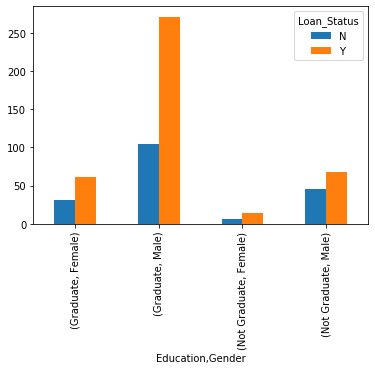

In [252]:
df.groupby(["Education","Gender","Loan_Status"]).count()["Loan_ID"].unstack().plot.bar()
df.groupby(["Education","Gender","Loan_Status"]).count()["Loan_ID"].unstack()

Loan_Status            N    Y
Property_Area Gender         
Rural         Female  10   14
              Male    57   94
Semiurban     Female  13   42
              Male    39  133
Urban         Female  14   19
              Male    54  112

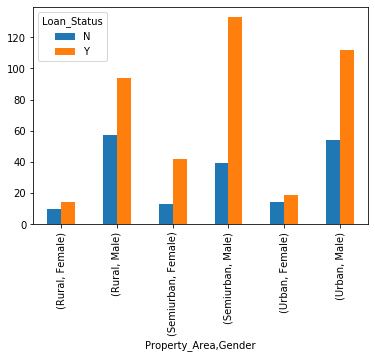

In [253]:
df.groupby(["Property_Area","Gender","Loan_Status"]).count()["Loan_ID"].unstack().plot.bar()
df.groupby(["Property_Area","Gender","Loan_Status"]).count()["Loan_ID"].unstack()

Gender,Female,Male
Property_Area,,
Rural,4353.375000,5691.291391
Semiurban,4787.272727,5412.529070
Urban,4614.787879,5258.909639


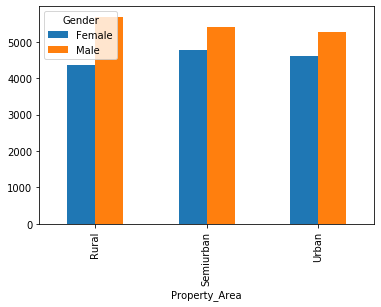

In [255]:
df.groupby(["Property_Area","Gender"]).mean()["ApplicantIncome"].unstack().plot.bar()
df.groupby(["Property_Area","Gender"]).mean()["ApplicantIncome"].unstack()

In [251]:
cnt10,cnt11=0,0
for i,j in enumerate(df["Gender"]):
    if df["Loan_Status"][i]=="Y" and df["Gender"][i]=="Male":
        cnt10+=1
    if df["Loan_Status"][i]=="Y" and df["Gender"][i]=="Female":
        cnt11+=1
print("Number of males accepted",cnt10,"Ratio",cnt10/489)
print("Number of females accepted",cnt11,"Ratio",cnt11/112)

Number of males accepted 339 Ratio 0.6932515337423313
Number of females accepted 75 Ratio 0.6696428571428571
